In [ ]:
Arquivo desenvolvido durante pós graduação em IA no SENAC-SP

# Passo-a-Passo
- Importar a Base de Dados
- Definir as Hypoteses
- Filtrar a Base nas Colunas
- Normalização/Padronização
- Coluna_y
- Regressão
- Generalizar tudo:
  - Benchmark
  - Plotar Tudo, pq quero ver, e meu chefe também!
  - Todas Hypoteses e listar
- Partir pro abraço, e fazer festa!

In [ ]:
import time
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')
import io
import sys
sys.path.append('drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Passos

1.   Vamos usar o DataFrame sem distinção de sazonalidade
2.   Benchmark usando o DataFrame com distinção de sazonalidade
3.   Comparação de resultados



In [ ]:
arquivo_1 = "drive/MyDrive/Base_MSI_sem_sazonalidade.csv"
arquivo_2 = "drive/MyDrive/Base_MSI_com_sazonalidade.csv"
Coluna_y = "close"

In [ ]:
df_hipotese_1 = pd.read_csv(arquivo_1, index_col = 0)
df_hipotese_1.sample(3)

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana,close
date,,,,,,,
2015-08-01,2015,8,1,213,31,6,60.16
2017-05-04,2017,5,4,124,18,4,86.10
2014-09-28,2014,9,28,271,39,7,63.42


In [ ]:
df_hipotese_2 = pd.read_csv(arquivo_2, index_col = 0)
df_hipotese_2.sample(3)

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,...,Dia_29,Dia_30,Dia_31,Dia_da_Semana_2,Dia_da_Semana_3,Dia_da_Semana_4,Dia_da_Semana_5,Dia_da_Semana_6,Dia_da_Semana_7,close
date,,,,,,,,,,,,,,,,,,,,,
2016-08-26,2016,8,26,239,34,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,77.20
2017-08-14,2017,8,14,226,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88.60
2013-06-30,2013,6,30,181,26,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,57.73


### Transformação da Base de Dados
- Entre 0 e 1
- Entre -1 e +1
- Entre qualquer range que você quiser
- Primeiro rode o modelo sem Normalizar, depois experimente um range

### Normalização Entre 0 e 1
- Com Média e Desvio Padrão
# $$ Dados\_Normalizados = \frac{Dados - Minimo}{Maximo - Minimo} $$

In [ ]:
def normalizar_escalas(dados,dados_minimo,dados_maximo):
  range_dados = dados_maximo - dados_minimo
  dados = (dados - dados_minimo)/ range_dados
  return dados

In [ ]:
# executa no loop
df_normalizada_1 = df_hipotese_1.copy()
for coluna, serie in df_normalizada_1.drop(columns = Coluna_y).iteritems():
    df_normalizada_1[coluna] = normalizar_escalas(serie.values, serie.min(), serie.max())
df_normalizada_1.describe()

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana,close
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,0.420920,0.502141,0.490927,0.498905,0.492554,0.500000,70.429091
std,0.289393,0.313589,0.293391,0.288912,0.289794,0.333516,10.718134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.010000
25%,0.200000,0.272727,0.233333,0.249315,0.250000,0.166667,62.500000
50%,0.400000,0.545455,0.500000,0.498630,0.500000,0.500000,66.780000
75%,0.600000,0.818182,0.733333,0.747945,0.750000,0.833333,78.047500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,103.870000


In [ ]:
# executa no loop
df_normalizada_2 = df_hipotese_2.copy()
for coluna, serie in df_normalizada_2.drop(columns = Coluna_y).iteritems():
    df_normalizada_2[coluna] = normalizar_escalas(serie.values, serie.min(), serie.max())
df_normalizada_2.describe()

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,...,Dia_29,Dia_30,Dia_31,Dia_da_Semana_2,Dia_da_Semana_3,Dia_da_Semana_4,Dia_da_Semana_5,Dia_da_Semana_6,Dia_da_Semana_7,close
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,...,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,0.420920,0.502141,0.490927,0.498905,0.492554,0.077218,0.084885,0.082147,0.084885,0.082147,...,0.030668,0.030120,0.019168,0.142935,0.142935,0.142388,0.142935,0.142935,0.142935,70.429091
std,0.289393,0.313589,0.293391,0.288912,0.289794,0.267010,0.278787,0.274663,0.278787,0.274663,...,0.172464,0.170966,0.137151,0.350103,0.350103,0.349543,0.350103,0.350103,0.350103,10.718134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.010000
25%,0.200000,0.272727,0.233333,0.249315,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.500000
50%,0.400000,0.545455,0.500000,0.498630,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.780000
75%,0.600000,0.818182,0.733333,0.747945,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.047500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,103.870000


### Padronização Entre -1 e +1 ~Teoricamente~
- Com Média = 0 e Desvio Padrão = 1
# $$ Dados\_Padronizados = \frac{Dados - Media}{Desvio\_Padrao} $$

# $$ Dados\_Padronizados = \frac{Dados - \mu }{\sigma} $$

In [ ]:
# função padronização
def padronizacao(dados, media, desvio_padrao):
    return (dados - media) / desvio_padrao

In [ ]:
# executa no loop
df_padronizada_1 = df_hipotese_1.copy()
for coluna, serie in df_padronizada_1.drop(columns = Coluna_y).iteritems():
    df_padronizada_1[coluna] = padronizacao(serie.values, serie.mean(), serie.std())
df_padronizada_1.describe()

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana,close
count,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1826.000000
mean,-5.751758e-15,3.810996e-16,-8.572916e-18,-1.070094e-17,2.592547e-16,3.040041e-20,70.429091
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,10.718134
min,-1.454492e+00,-1.601271e+00,-1.673286e+00,-1.726837e+00,-1.699670e+00,-1.499179e+00,54.010000
25%,-7.633906e-01,-7.315741e-01,-8.779883e-01,-8.638939e-01,-8.369881e-01,-9.994525e-01,62.500000
50%,-7.228935e-02,1.381227e-01,3.092341e-02,-9.503669e-04,2.569366e-02,0.000000e+00,66.780000
75%,6.188119e-01,1.007820e+00,8.262212e-01,8.619931e-01,8.883754e-01,9.994525e-01,78.047500
max,2.001015e+00,1.587617e+00,1.735133e+00,1.734420e+00,1.751057e+00,1.499179e+00,103.870000


In [ ]:
# executa no loop
df_padronizada_2 = df_hipotese_2.copy()
for coluna, serie in df_padronizada_2.drop(columns = Coluna_y).iteritems():
    df_padronizada_2[coluna] = padronizacao(serie.values, serie.mean(), serie.std())
df_padronizada_2.describe()

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,...,Dia_29,Dia_30,Dia_31,Dia_da_Semana_2,Dia_da_Semana_3,Dia_da_Semana_4,Dia_da_Semana_5,Dia_da_Semana_6,Dia_da_Semana_7,close
count,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,...,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1826.000000
mean,-5.751758e-15,3.810996e-16,-8.572916e-18,-1.070094e-17,2.592547e-16,9.295230e-16,-9.393119e-16,1.548597e-16,-7.843306e-16,-8.475635e-17,...,-1.754104e-17,-3.015721e-17,1.788760e-16,4.590462e-17,4.596542e-17,1.690263e-17,4.590462e-17,1.732823e-17,1.428819e-17,70.429091
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,10.718134
min,-1.454492e+00,-1.601271e+00,-1.673286e+00,-1.726837e+00,-1.699670e+00,-2.891949e-01,-3.044799e-01,-2.990816e-01,-3.044799e-01,-2.990816e-01,...,-1.778232e-01,-1.761786e-01,-1.397550e-01,-4.082669e-01,-4.082669e-01,-4.073539e-01,-4.082669e-01,-4.082669e-01,-4.082669e-01,54.010000
25%,-7.633906e-01,-7.315741e-01,-8.779883e-01,-8.638939e-01,-8.369881e-01,-2.891949e-01,-3.044799e-01,-2.990816e-01,-3.044799e-01,-2.990816e-01,...,-1.778232e-01,-1.761786e-01,-1.397550e-01,-4.082669e-01,-4.082669e-01,-4.073539e-01,-4.082669e-01,-4.082669e-01,-4.082669e-01,62.500000
50%,-7.228935e-02,1.381227e-01,3.092341e-02,-9.503669e-04,2.569366e-02,-2.891949e-01,-3.044799e-01,-2.990816e-01,-3.044799e-01,-2.990816e-01,...,-1.778232e-01,-1.761786e-01,-1.397550e-01,-4.082669e-01,-4.082669e-01,-4.073539e-01,-4.082669e-01,-4.082669e-01,-4.082669e-01,66.780000
75%,6.188119e-01,1.007820e+00,8.262212e-01,8.619931e-01,8.883754e-01,-2.891949e-01,-3.044799e-01,-2.990816e-01,-3.044799e-01,-2.990816e-01,...,-1.778232e-01,-1.761786e-01,-1.397550e-01,-4.082669e-01,-4.082669e-01,-4.073539e-01,-4.082669e-01,-4.082669e-01,-4.082669e-01,78.047500
max,2.001015e+00,1.587617e+00,1.735133e+00,1.734420e+00,1.751057e+00,3.455982e+00,3.282490e+00,3.341738e+00,3.282490e+00,3.341738e+00,...,5.620483e+00,5.672950e+00,7.151462e+00,2.448037e+00,2.448037e+00,2.453524e+00,2.448037e+00,2.448037e+00,2.448037e+00,103.870000


##Hipotese Filtro de Correlação

In [ ]:
df_corr_1 = df_hipotese_1.corr()[[Coluna_y]] ** 2
df_corr_1 = df_corr_1.sort_values(by=Coluna_y, ascending=False)
Qtd_corr_1 = round(len(df_corr_1)/2)
df_corr_1 = df_corr_1[:Qtd_corr_1].sort_values(by=Coluna_y)
list_corr_1 = list(df_corr_1.index)
df_correlacao_1 = df_hipotese_1[list_corr_1].copy()
df_correlacao_1

,Mes,Dia_do_Ano,Ano,close
date,,,,
2013-02-08,2,39,2013,60.30
2013-02-09,2,40,2013,60.30
2013-02-10,2,41,2013,60.30
2013-02-11,2,42,2013,60.90
2013-02-12,2,43,2013,60.83
...,...,...,...,...
2018-02-03,2,34,2018,103.87
2018-02-04,2,35,2018,103.87
2018-02-05,2,36,2018,101.06


In [ ]:
df_corr_2 = df_hipotese_2.corr()[[Coluna_y]] ** 2
df_corr_2 = df_corr_2.sort_values(by=Coluna_y, ascending=False)
Qtd_corr_2 = round(len(df_corr_2)/2)
df_corr_2 = df_corr_1[:Qtd_corr_2].sort_values(by=Coluna_y)
list_corr_2 = list(df_corr_2.index)
df_correlacao_2 = df_hipotese_2[list_corr_2].copy()
df_correlacao_2

,Mes,Dia_do_Ano,Ano,close
date,,,,
2013-02-08,2,39,2013,60.30
2013-02-09,2,40,2013,60.30
2013-02-10,2,41,2013,60.30
2013-02-11,2,42,2013,60.90
2013-02-12,2,43,2013,60.83
...,...,...,...,...
2018-02-03,2,34,2018,103.87
2018-02-04,2,35,2018,103.87
2018-02-05,2,36,2018,101.06


## Transformação Entre Oque_eu_Quiser e Oque_Eu_Desejar
- Com Média e Desvio Padrão à minha vontade

### $$ Range\_Escalas = (Range\_Maximo - Range\_Minimo) $$

### $$ Dados\_Transformados = (Dados\_Normalizados * Range\_Escalas) + Range\_Minimo $$

### $$ Dados\_Transformados = (Dados\_Normalizados * (Range\_Maximo - Range\_Minimo)) + Range\_Minimo $$

- Resumida
### $$ Dados\_Transformados = (\frac{Dados - \mu }{\sigma} * (RMax - RMin)) + RMin $$

In [ ]:
# função escalas_dinamicas
def escalas_dinamicas(dados, dados_minimo, dados_maximo, range_minimo, range_maximo):
    # Primeiro transforma entre 0 e 1
    dados = normalizar_escalas(dados, dados_minimo, dados_maximo)

    # Então mude a escala [x,y]:
    range_escalas = range_maximo - range_minimo
    return (dados * range_escalas) + range_minimo

In [ ]:
# roda o loop 
# Range 1 a 3 -> Arbitrário na regressão ou Quantos tipos serão classificados
df_universal_1 = df_hipotese_1.copy()
for coluna, serie in df_universal_1.drop(columns = Coluna_y).iteritems():
    df_universal_1[coluna] = escalas_dinamicas(serie.values,
                                    dados_minimo = serie.min(), dados_maximo = serie.max(),
                                    range_minimo = 1, range_maximo = 3)
df_universal_1.describe()

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana,close
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,1.841840,2.004282,1.981855,1.997809,1.985108,2.000000,70.429091
std,0.578786,0.627178,0.586782,0.577825,0.579588,0.667032,10.718134
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.010000
25%,1.400000,1.545455,1.466667,1.498630,1.500000,1.333333,62.500000
50%,1.800000,2.090909,2.000000,1.997260,2.000000,2.000000,66.780000
75%,2.200000,2.636364,2.466667,2.495890,2.500000,2.666667,78.047500
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,103.870000


In [ ]:
# roda o loop 
df_universal_2 = df_hipotese_2.copy()
for coluna, serie in df_universal_2.drop(columns = Coluna_y).iteritems():
    df_universal_2[coluna] = escalas_dinamicas(serie.values,
                                    dados_minimo = serie.min(), dados_maximo = serie.max(),
                                    range_minimo = 1, range_maximo = 3)
df_universal_2.describe()

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,...,Dia_29,Dia_30,Dia_31,Dia_da_Semana_2,Dia_da_Semana_3,Dia_da_Semana_4,Dia_da_Semana_5,Dia_da_Semana_6,Dia_da_Semana_7,close
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,...,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,1.841840,2.004282,1.981855,1.997809,1.985108,1.154436,1.169770,1.164294,1.169770,1.164294,...,1.061336,1.060241,1.038335,1.285871,1.285871,1.284775,1.285871,1.285871,1.285871,70.429091
std,0.578786,0.627178,0.586782,0.577825,0.579588,0.534020,0.557574,0.549327,0.557574,0.549327,...,0.344928,0.341931,0.274303,0.700206,0.700206,0.699086,0.700206,0.700206,0.700206,10.718134
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.010000
25%,1.400000,1.545455,1.466667,1.498630,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.500000
50%,1.800000,2.090909,2.000000,1.997260,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.780000
75%,2.200000,2.636364,2.466667,2.495890,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.047500
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,103.870000


# Generalizada

In [ ]:
Nomes_df_1 = ["df_hipotese_1","df_normalizada_1","df_padronizada_1","df_universal_1","df_correlacao_1"]
Opcoes_df_1 = [df_hipotese_1,df_normalizada_1,df_padronizada_1,df_universal_1,df_correlacao_1]

In [ ]:
Nomes_df_2 = ["df_hipotese_2","df_normalizada_2","df_padronizada_2","df_universal_2","df_correlacao_2"]
Opcoes_df_2 = [df_hipotese_2,df_normalizada_2,df_padronizada_2,df_universal_2,df_correlacao_2]

In [ ]:
Nomes_df = Nomes_df_1 + Nomes_df_2
Opcoes_df = Opcoes_df_1 + Opcoes_df_2

In [ ]:
# Importa os modelos que quiser
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Importar os personalizados
from pseudo_inversa import PseudoInversa
from rbf import RadialBasisFunction

In [ ]:
Nomes_Modelos = ["LinearRegression", "ElasticNet", "MLPRegressor", "PseudoInversa", "RadialBasisFunction", "GradientBoostingRegressor", "RandomForestRegressor"]
Opcoes_Modelos = [LinearRegression, ElasticNet, MLPRegressor, PseudoInversa, RadialBasisFunction, GradientBoostingRegressor, RandomForestRegressor]

# Benchmark 1

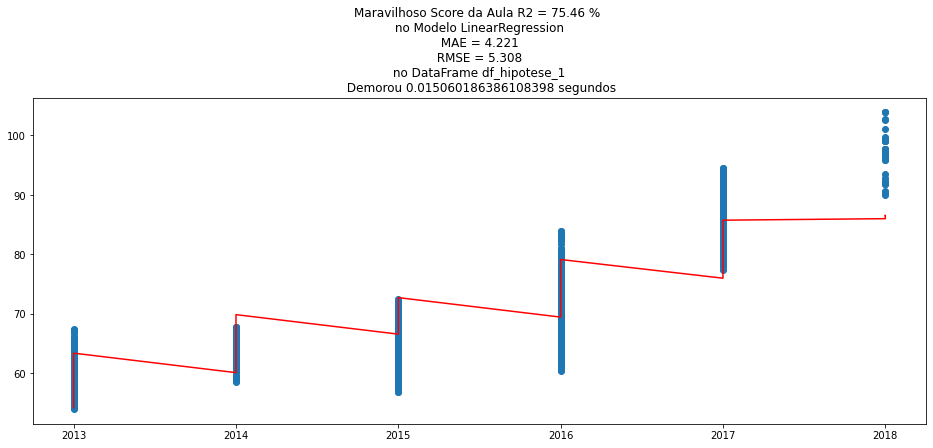

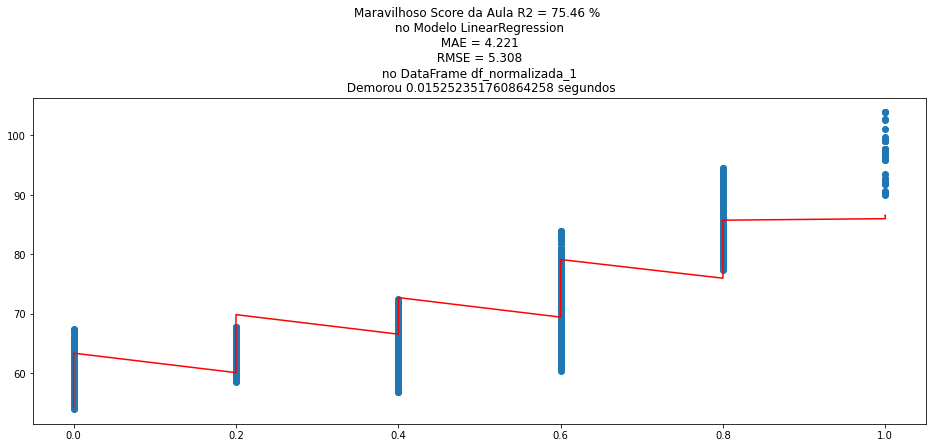

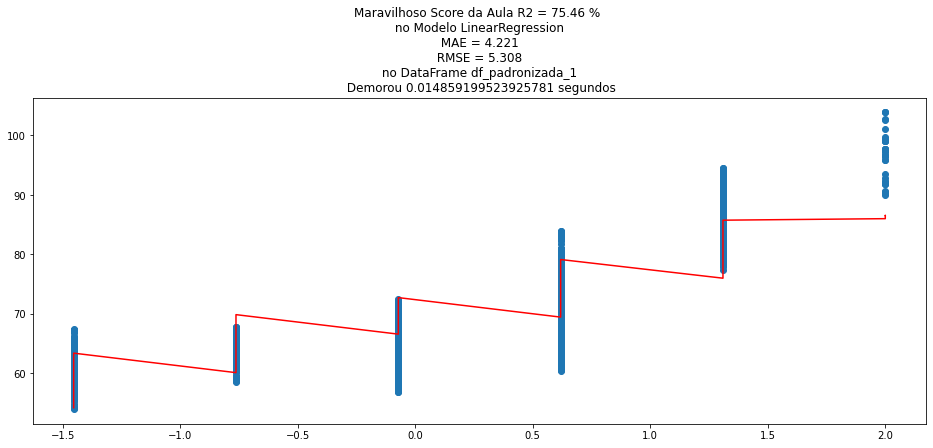

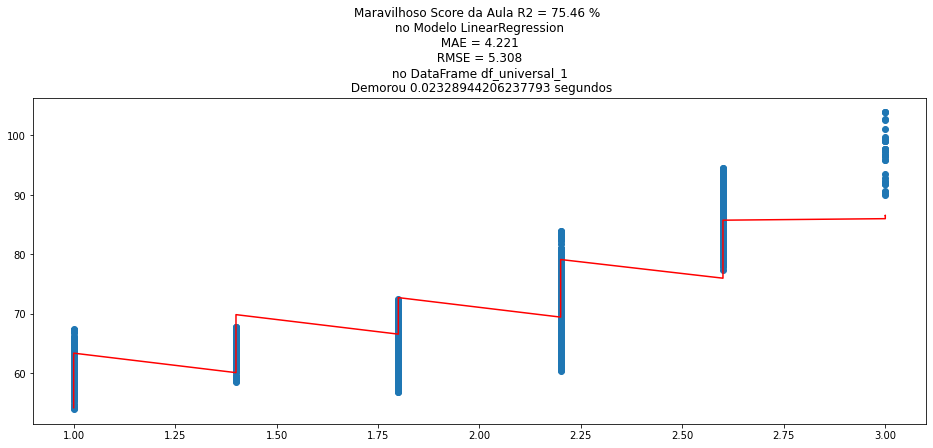

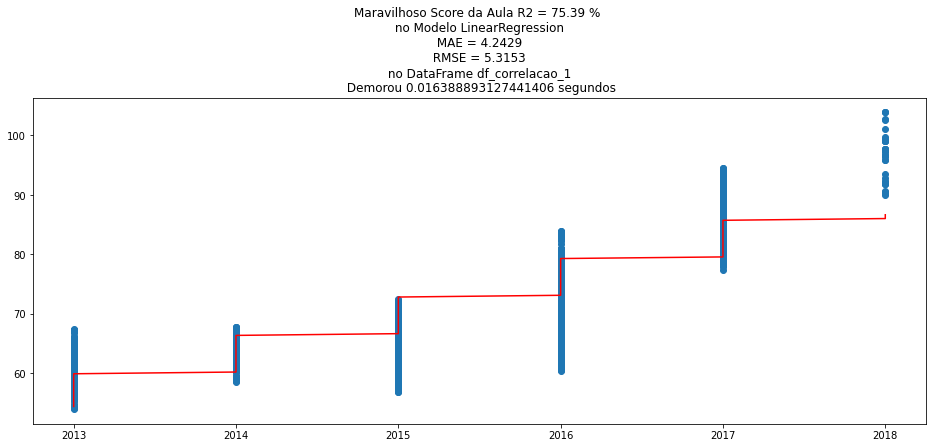

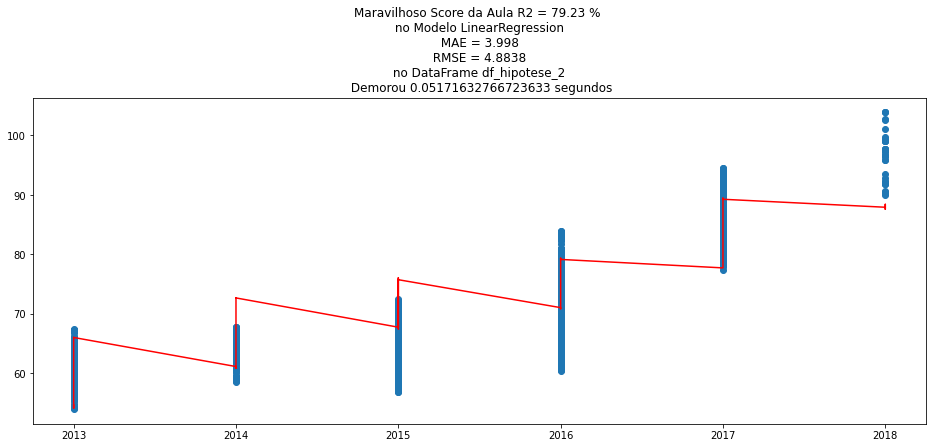

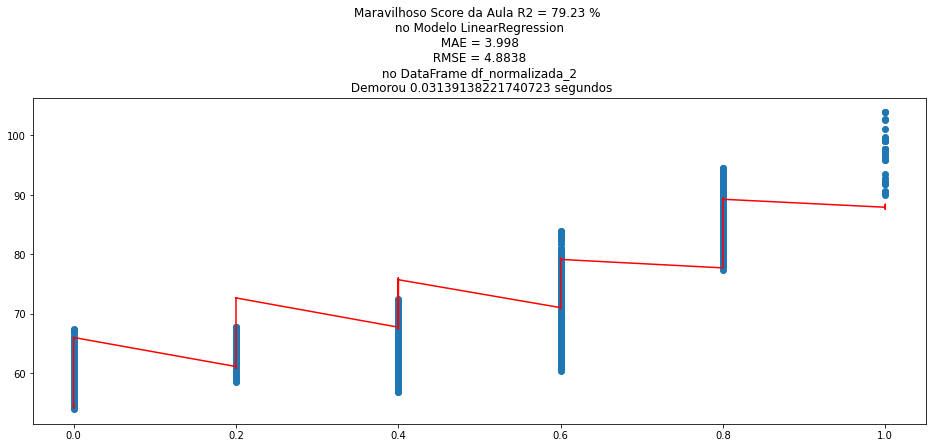

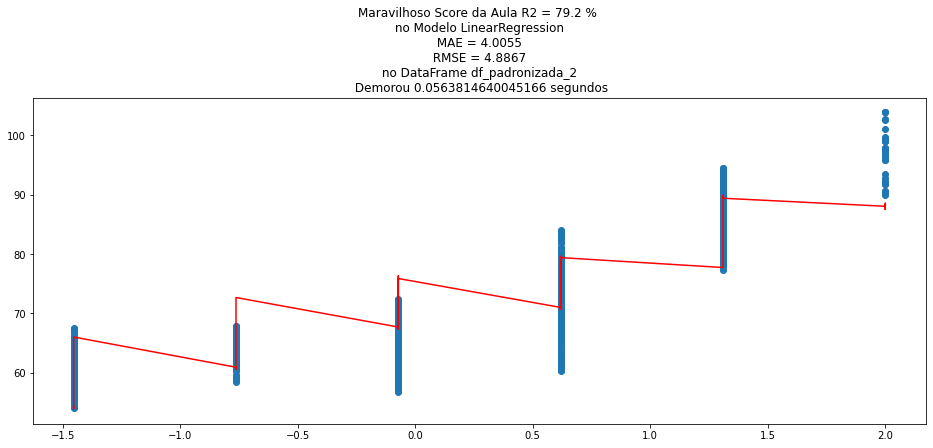

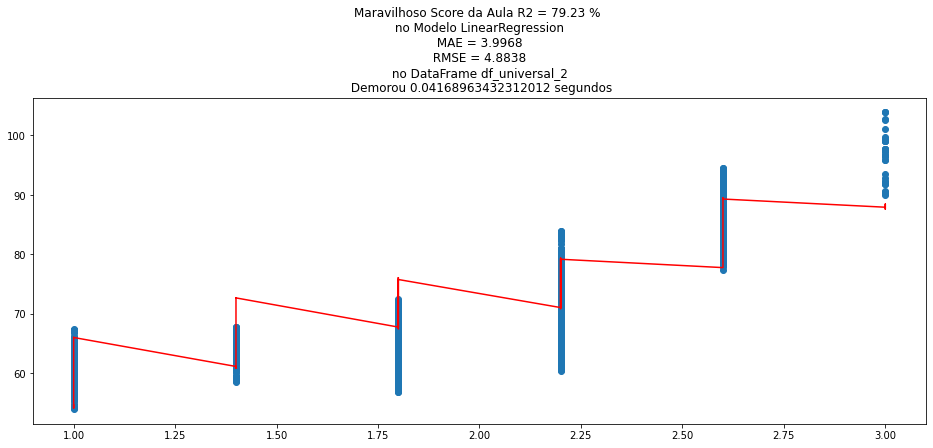

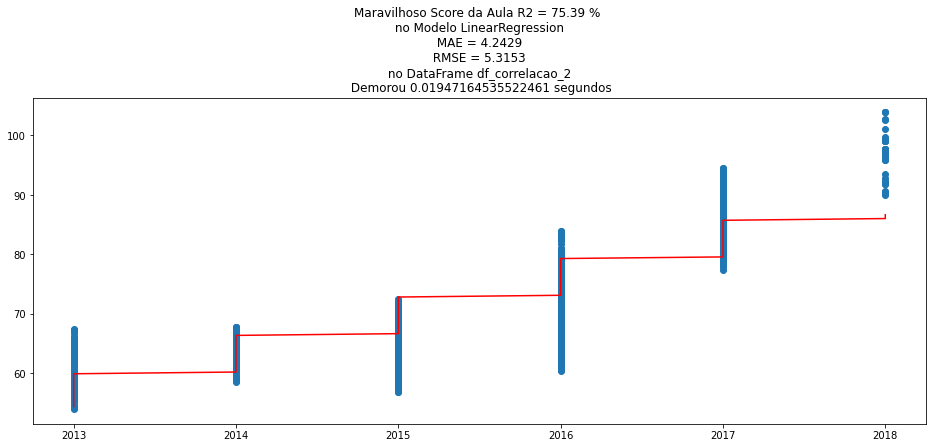

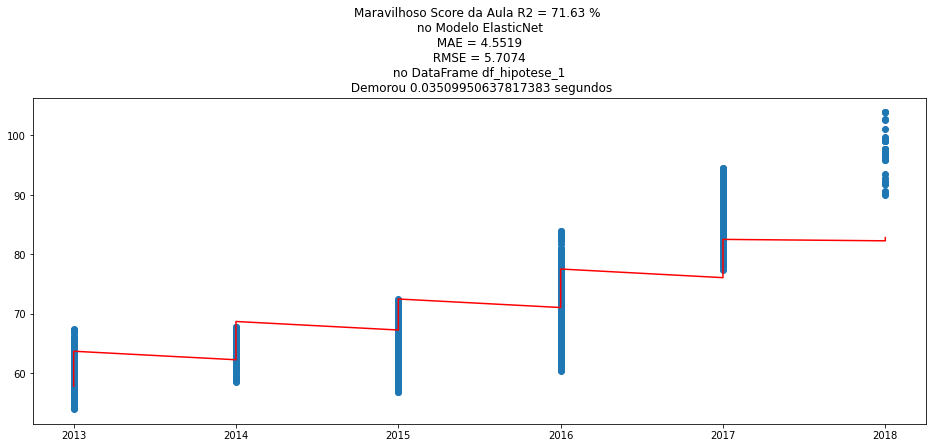

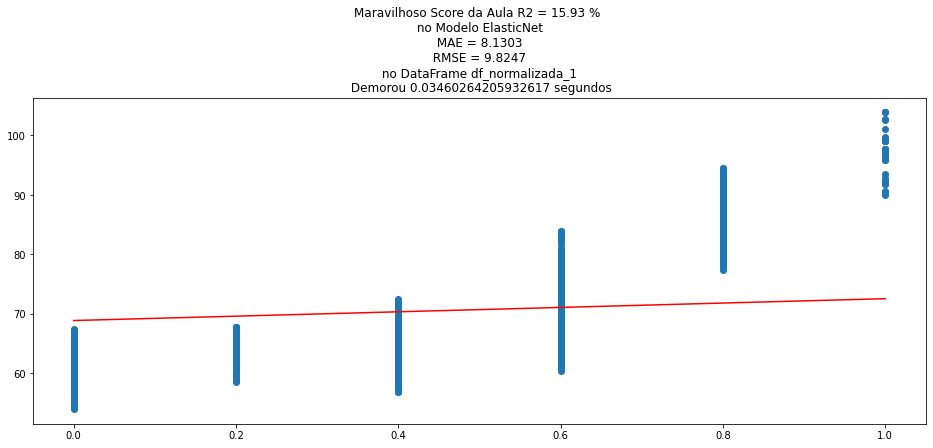

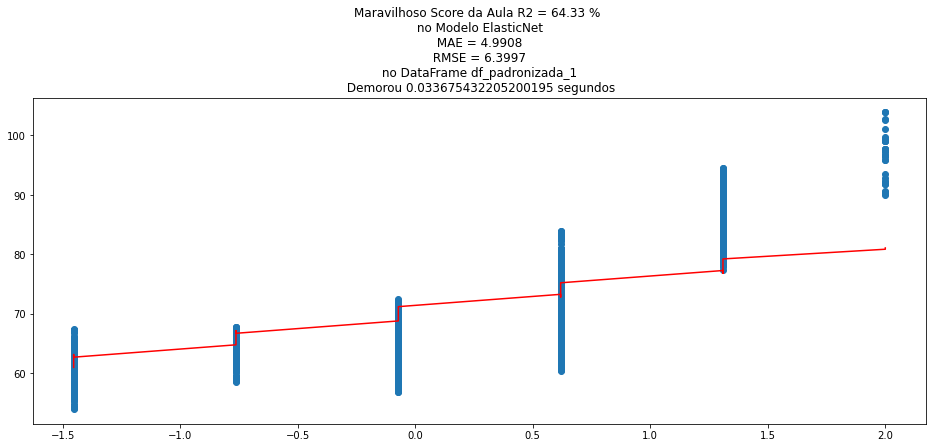

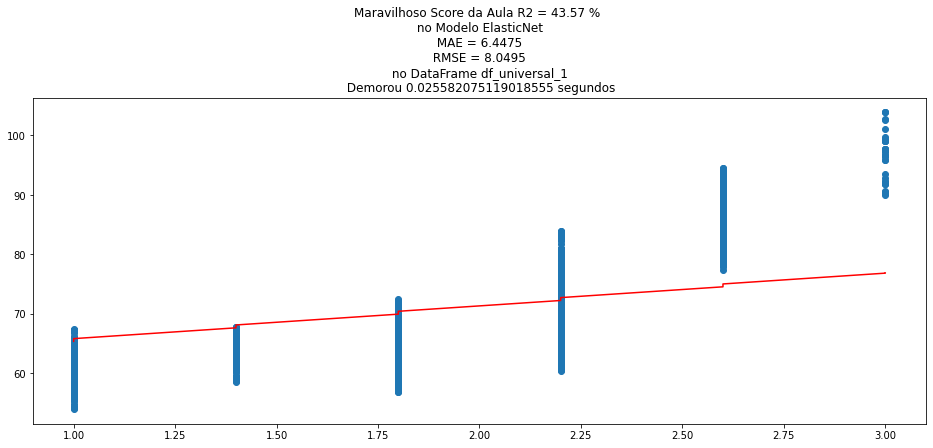

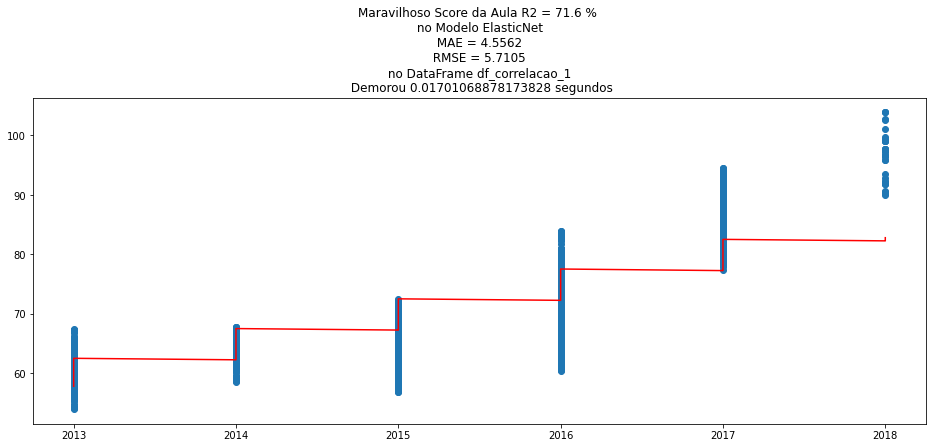

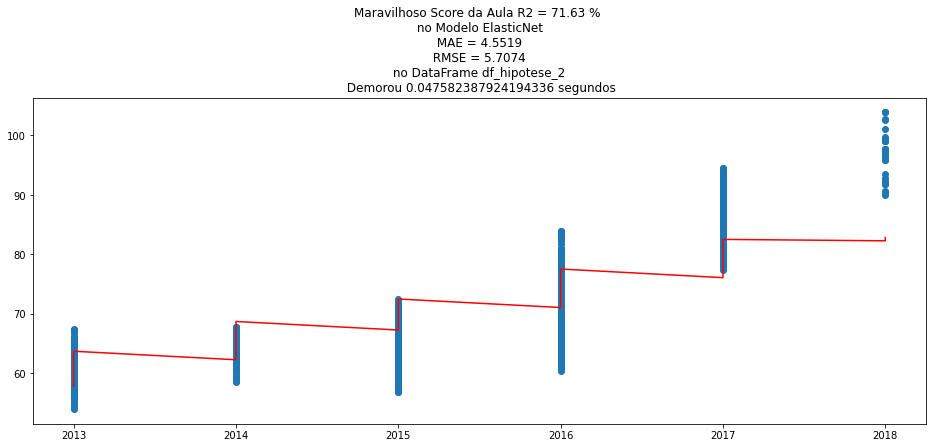

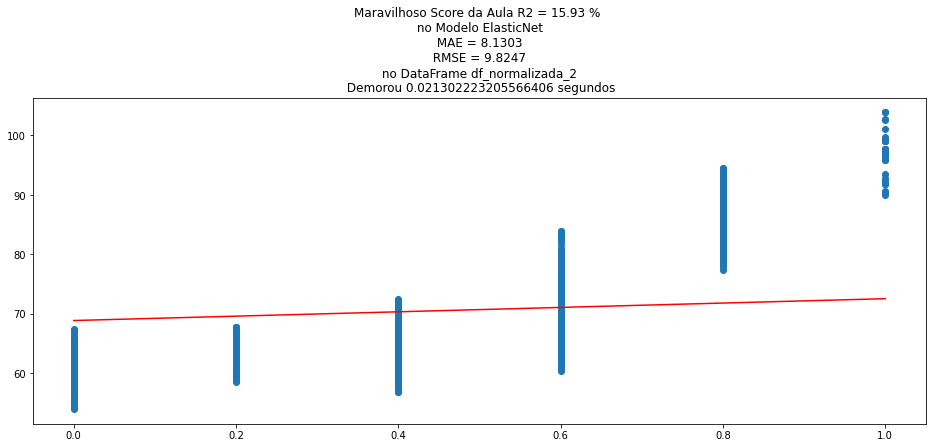

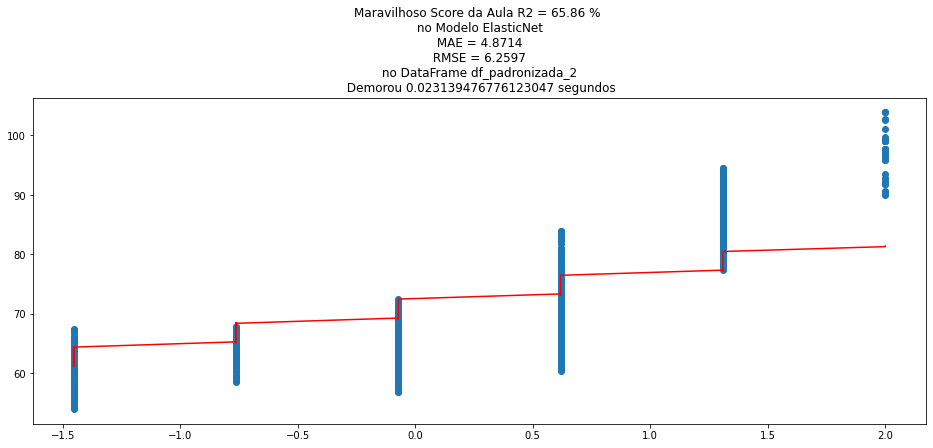

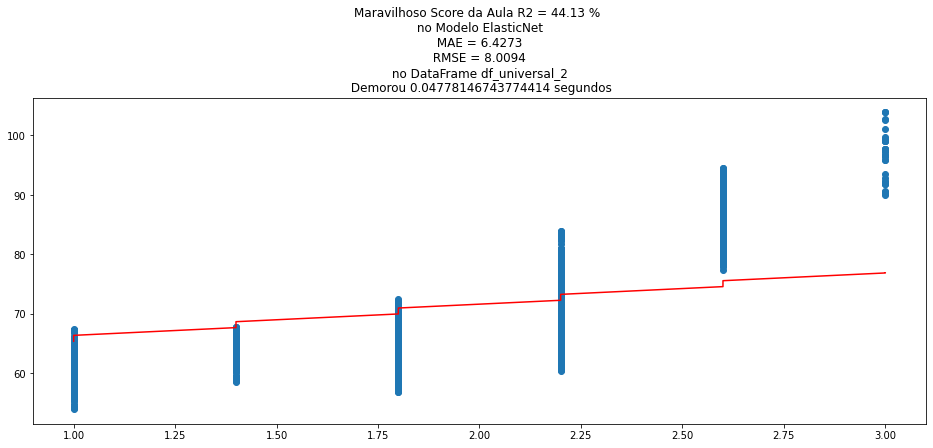

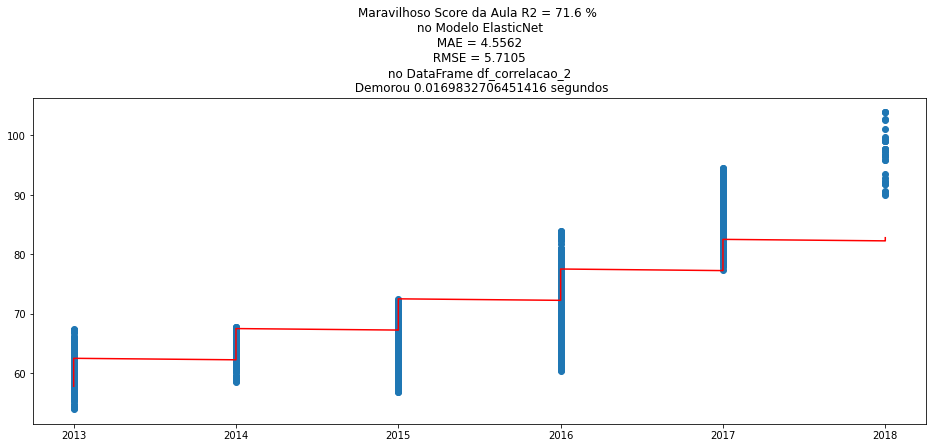

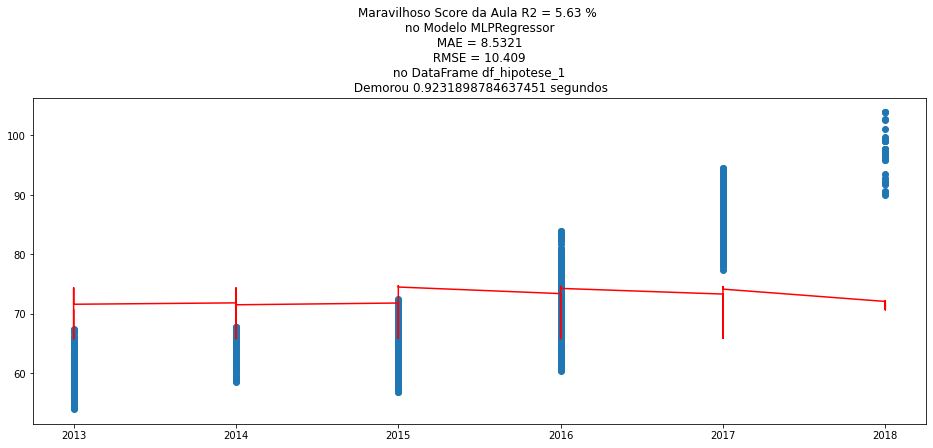

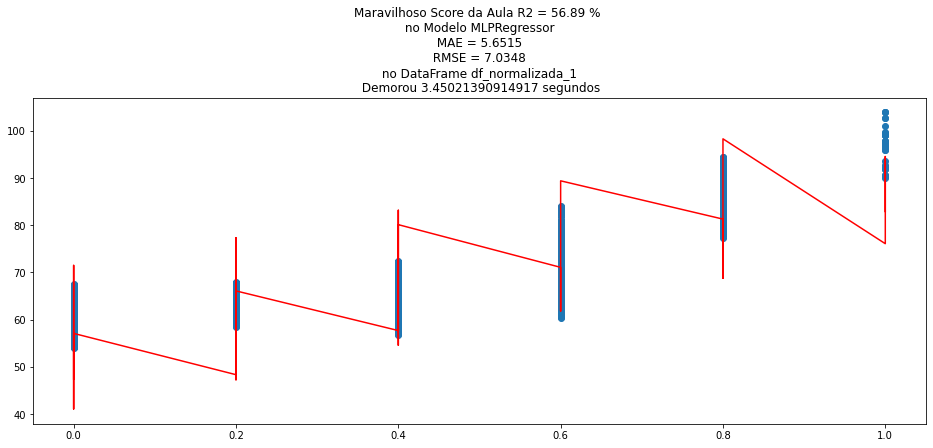

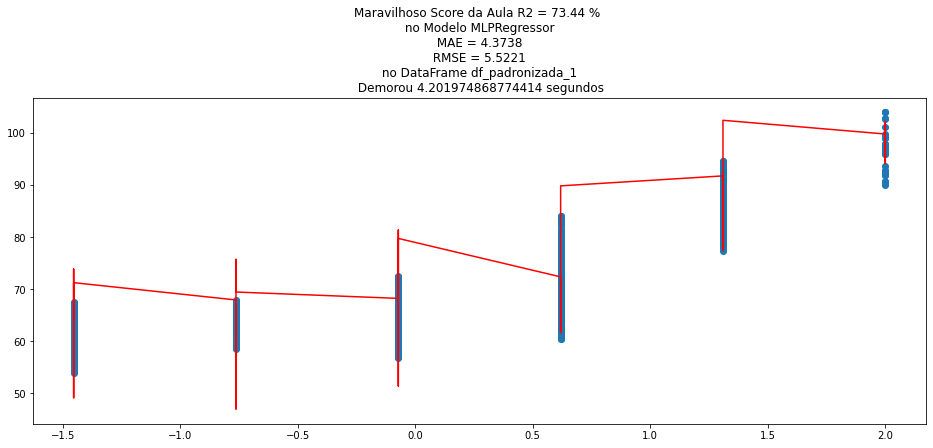

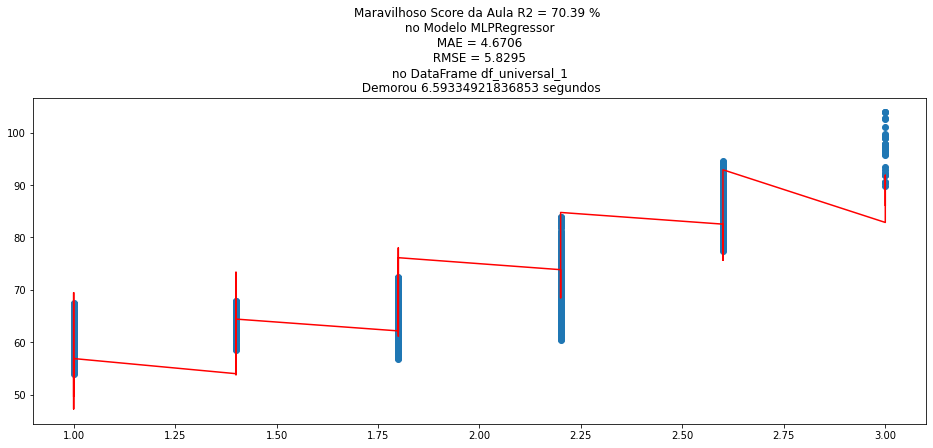

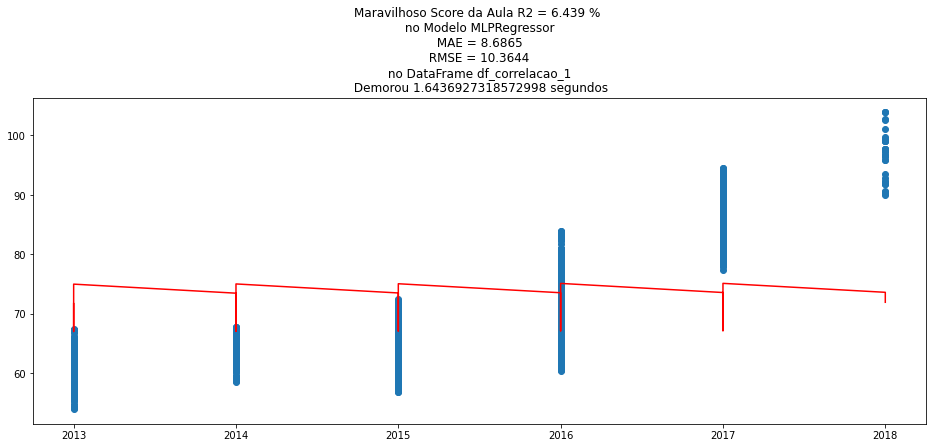

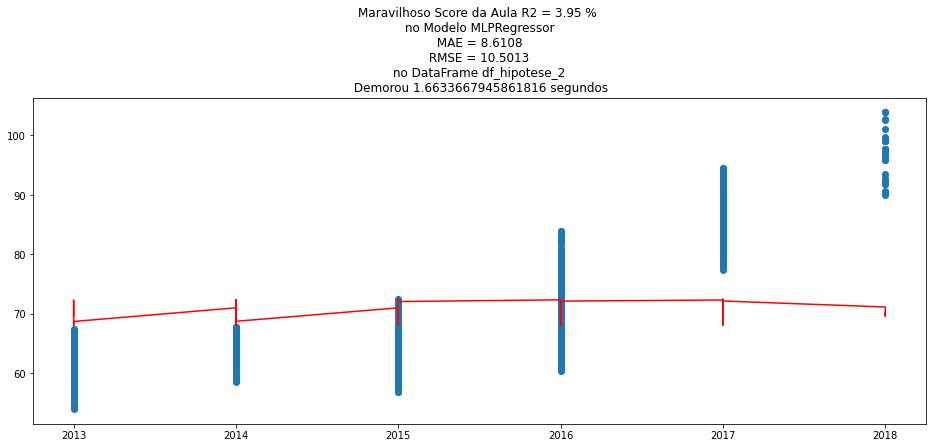

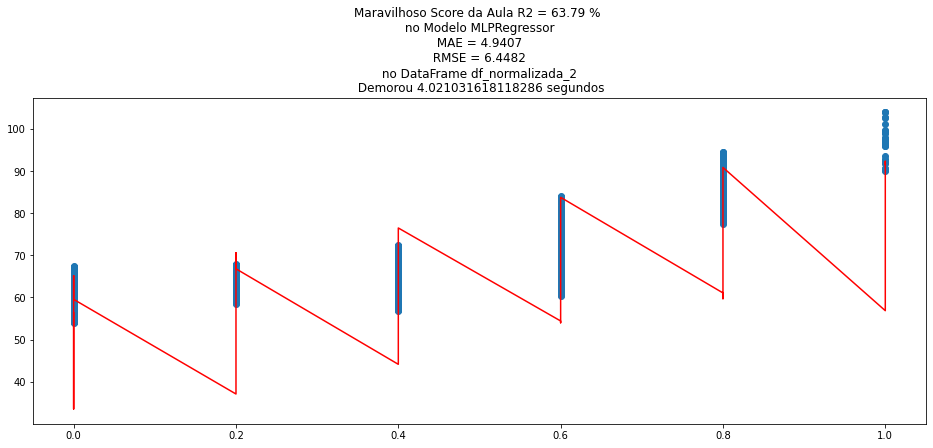

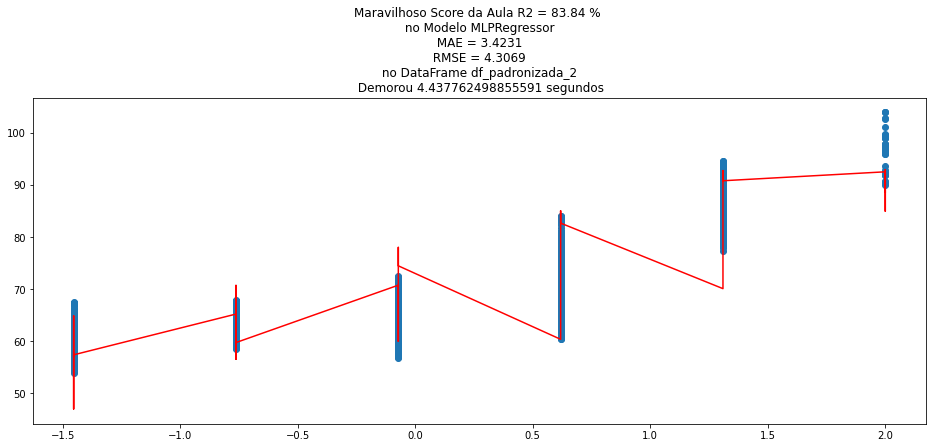

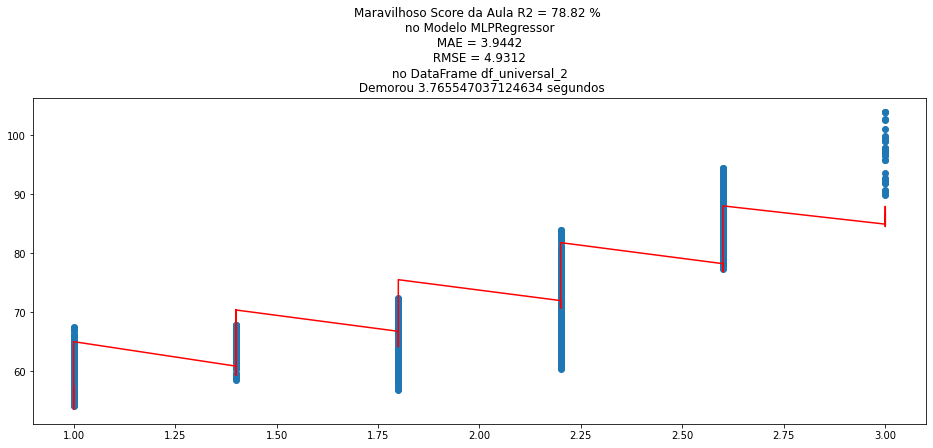

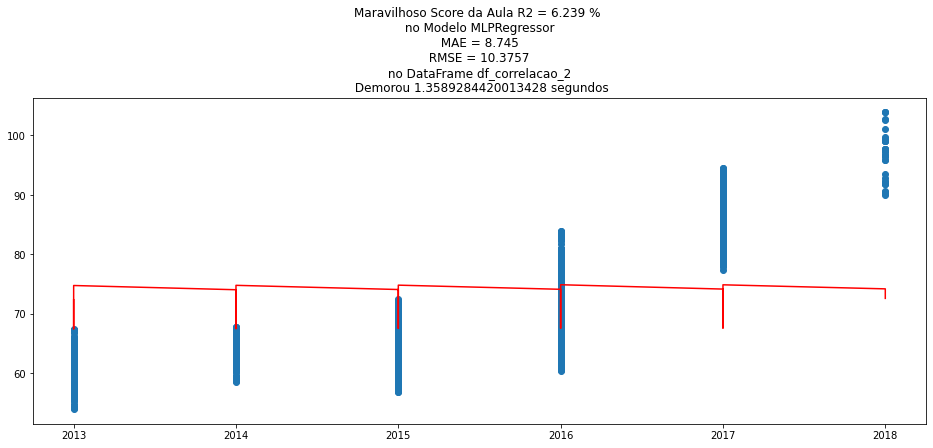

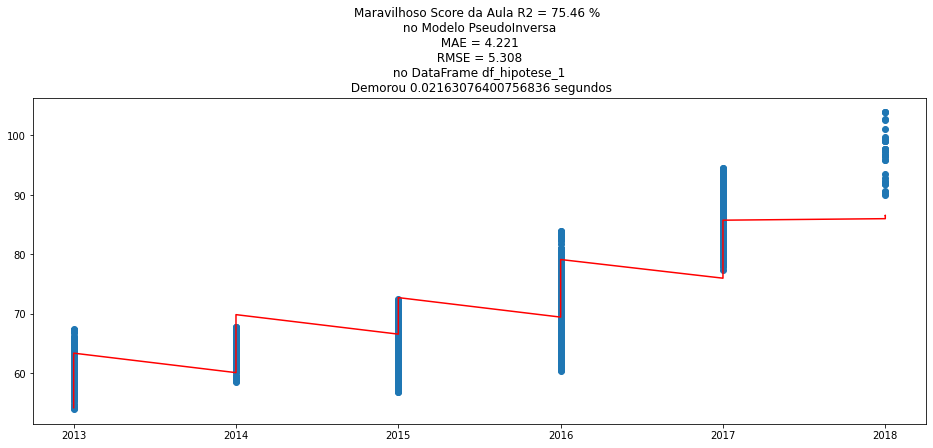

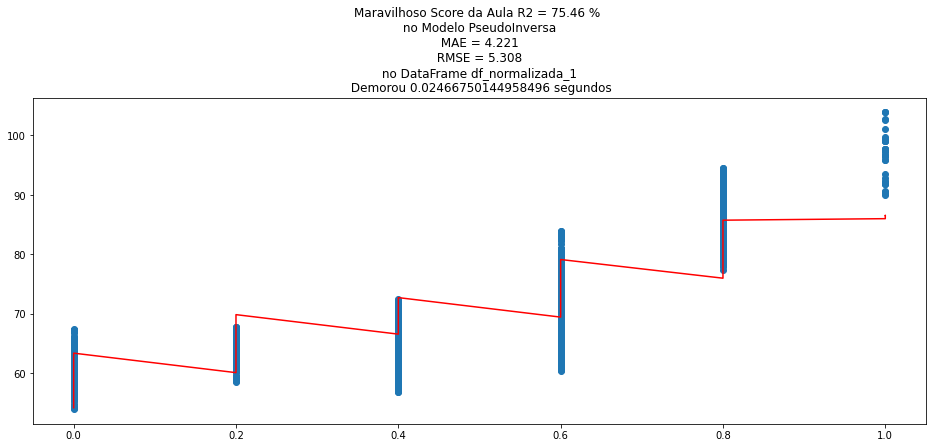

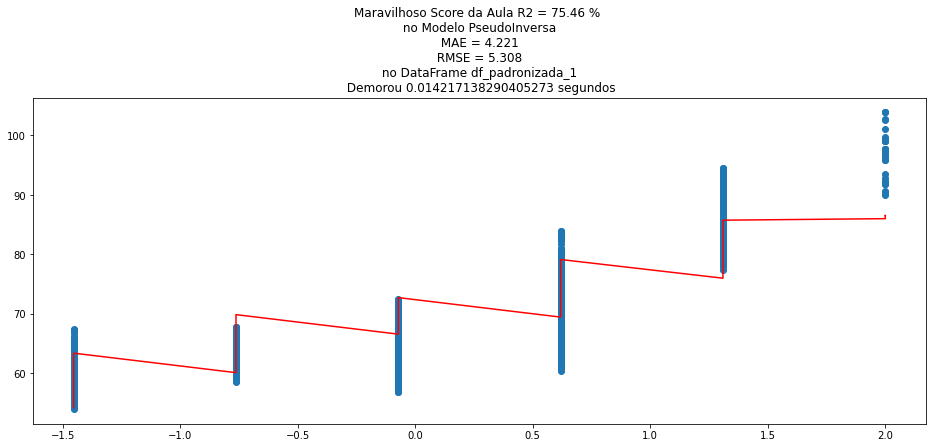

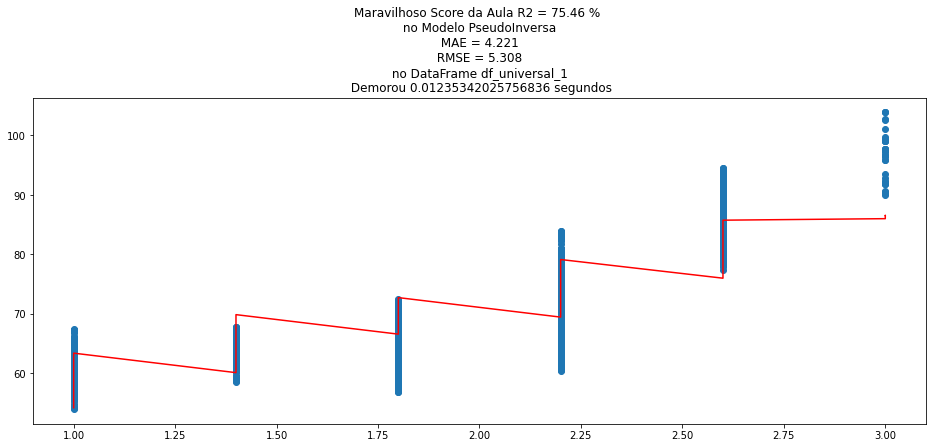

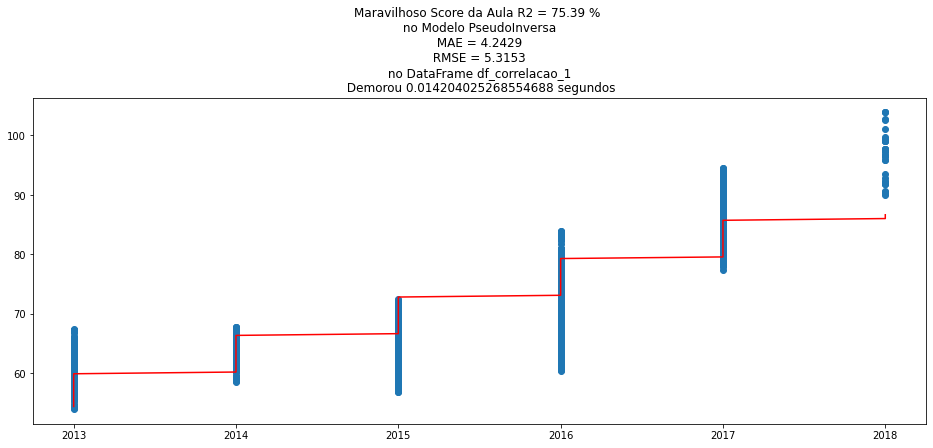

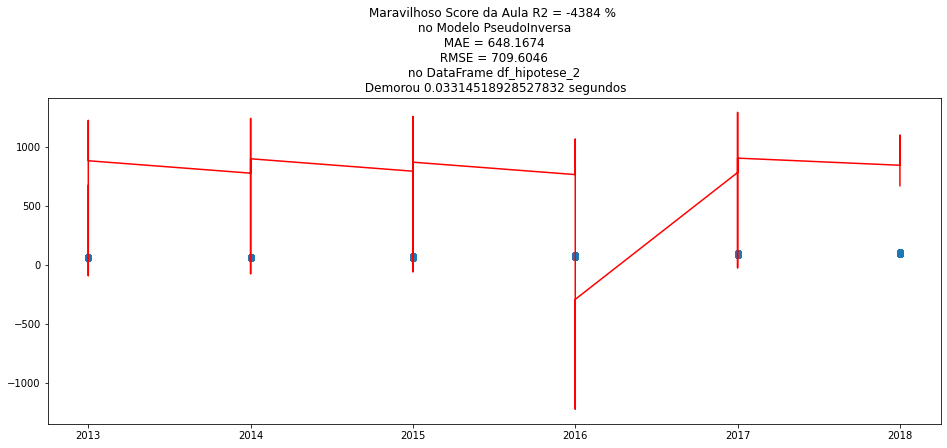

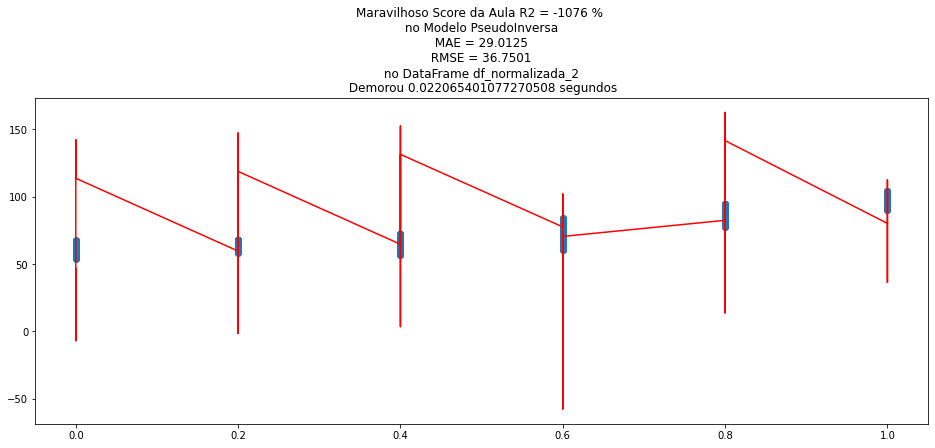

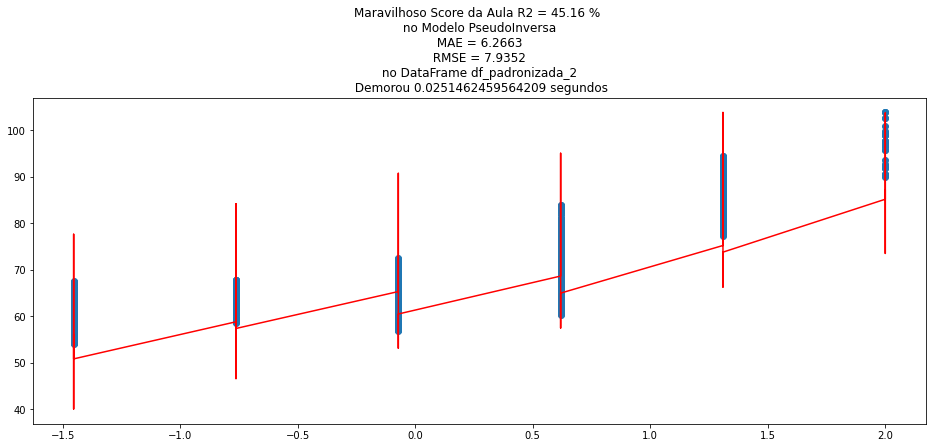

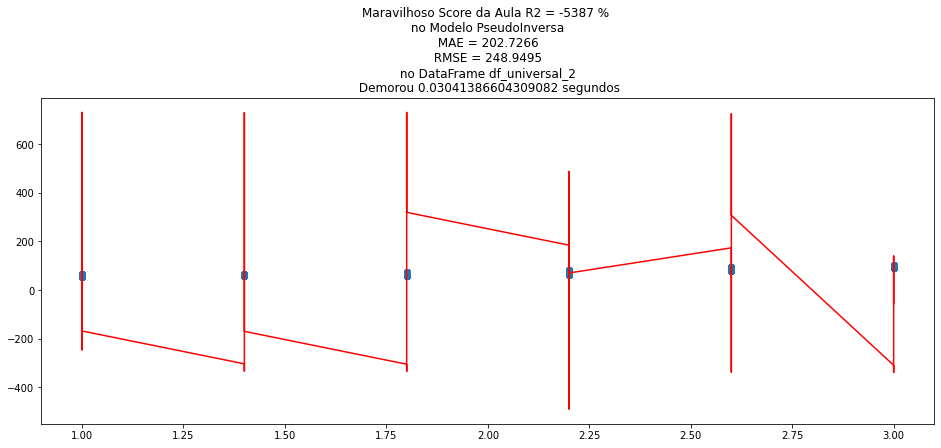

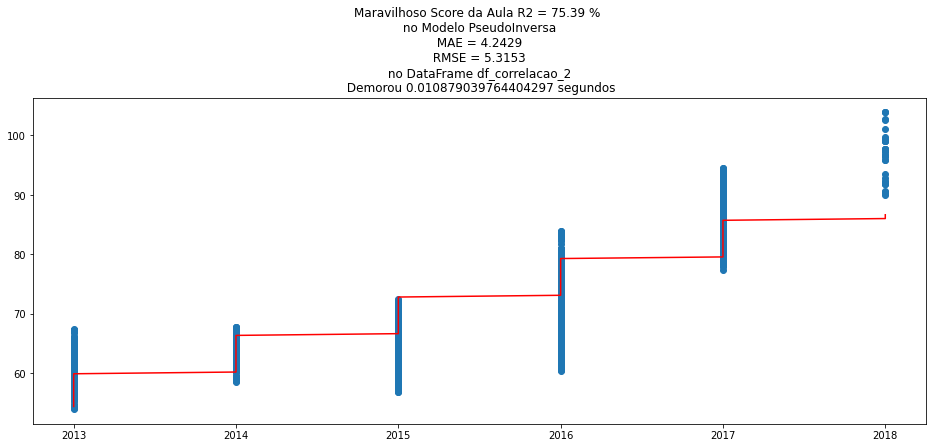

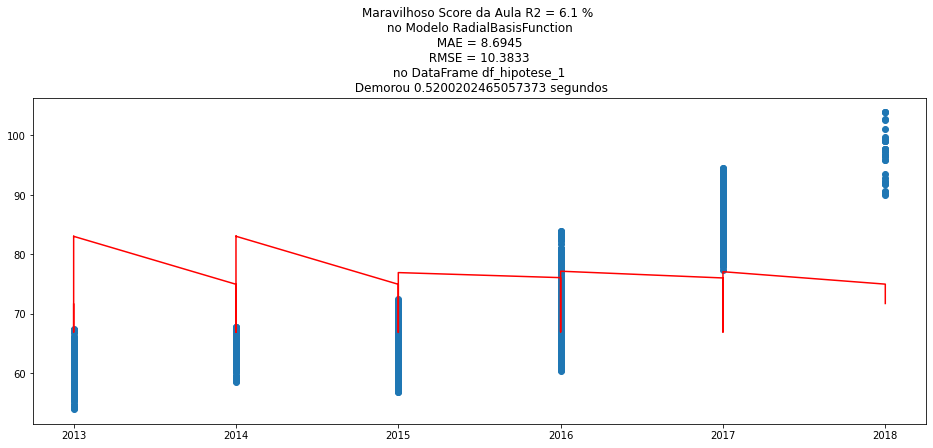

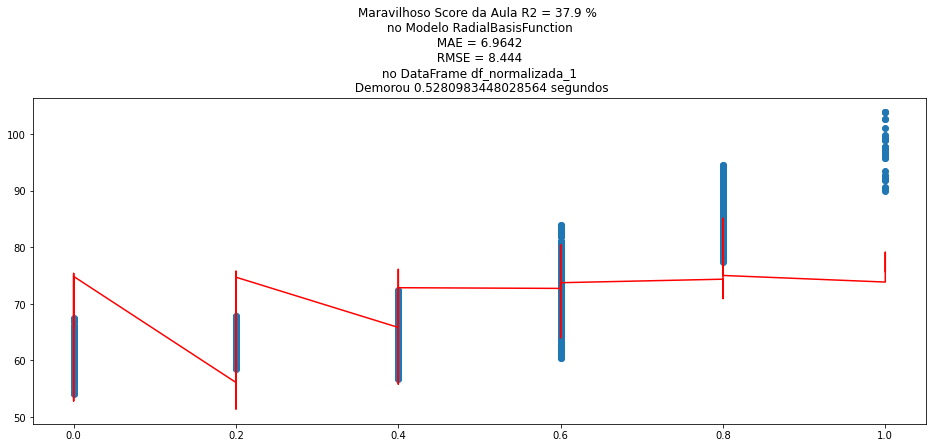

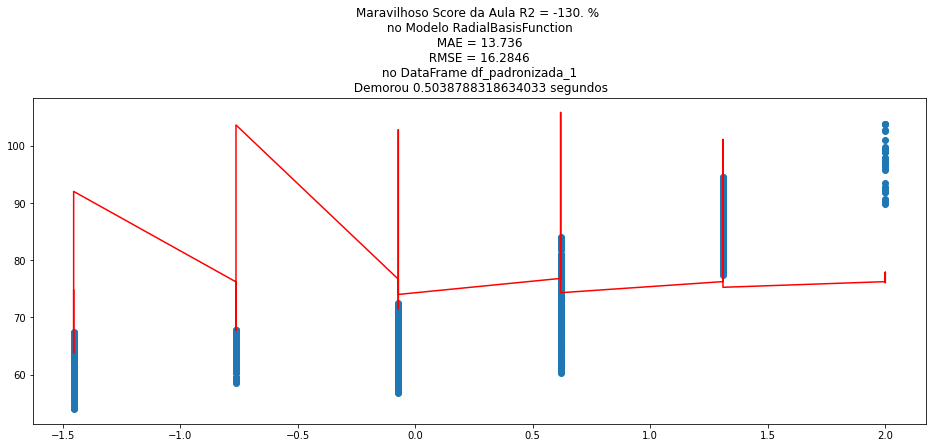

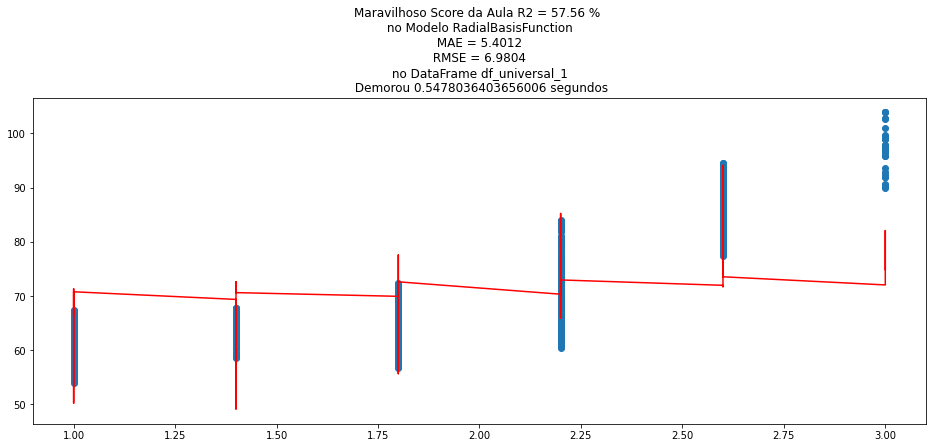

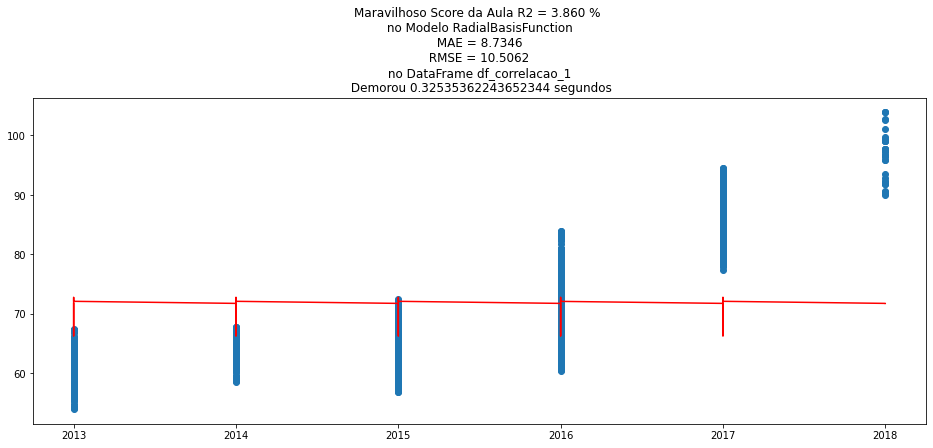

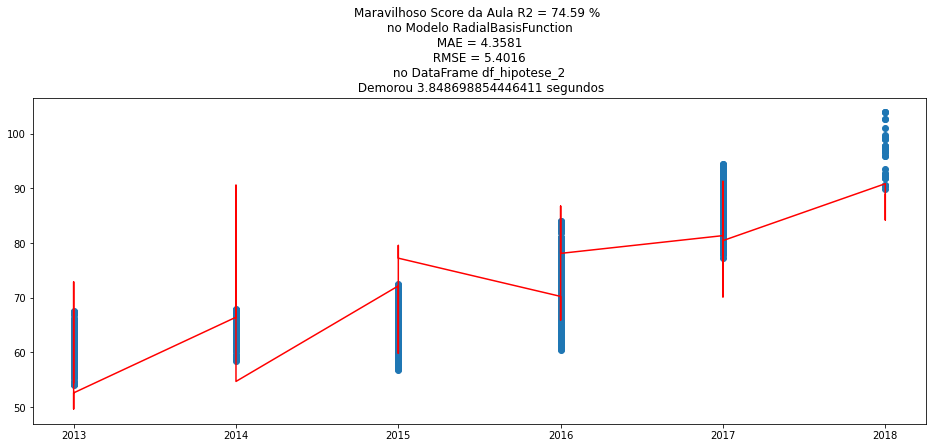

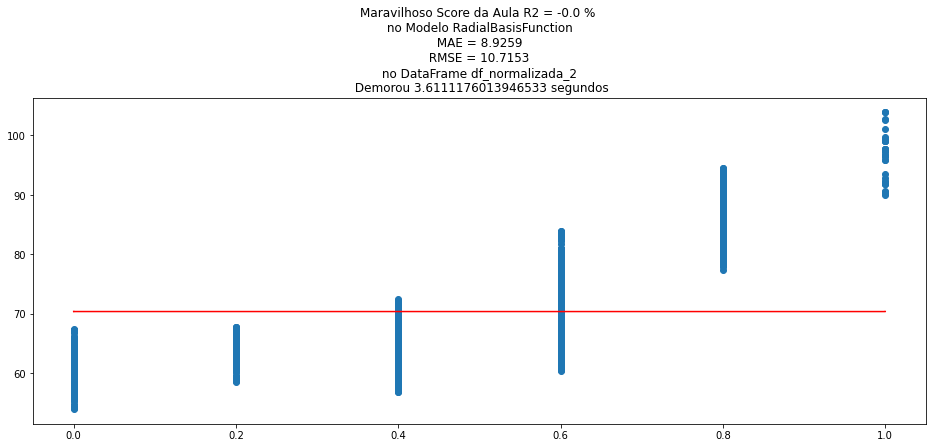

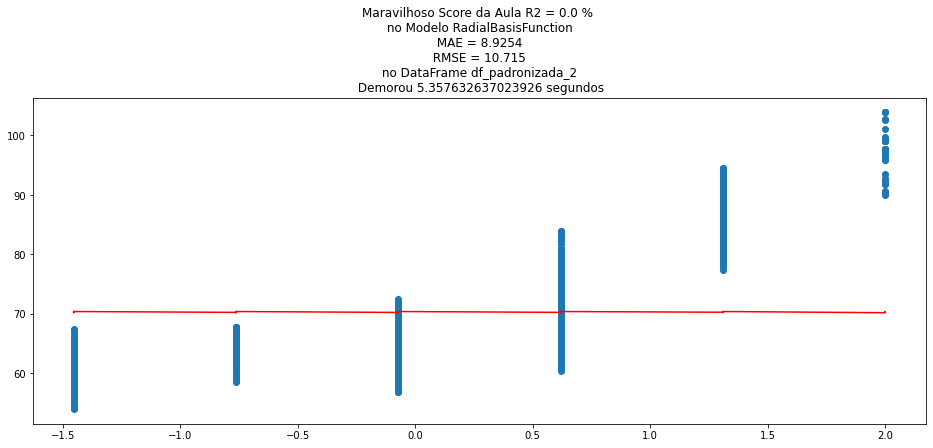

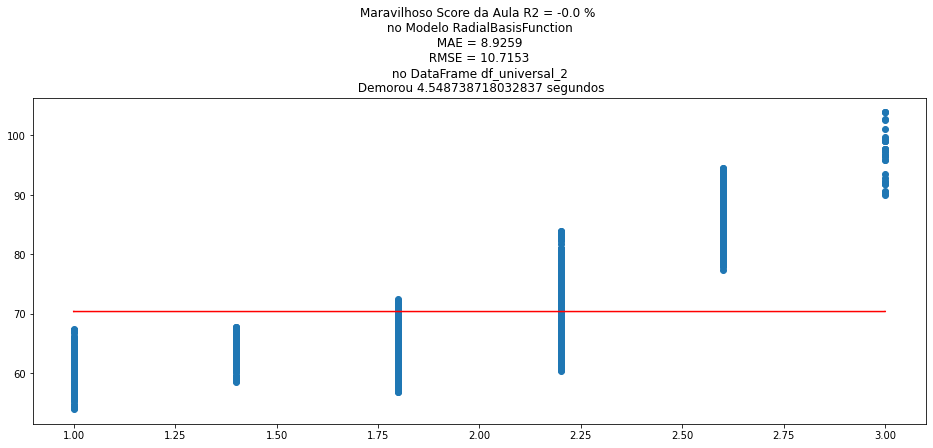

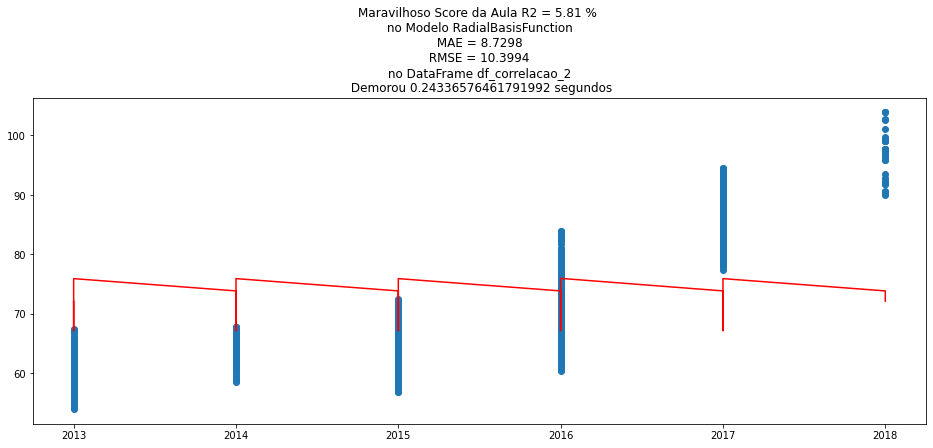

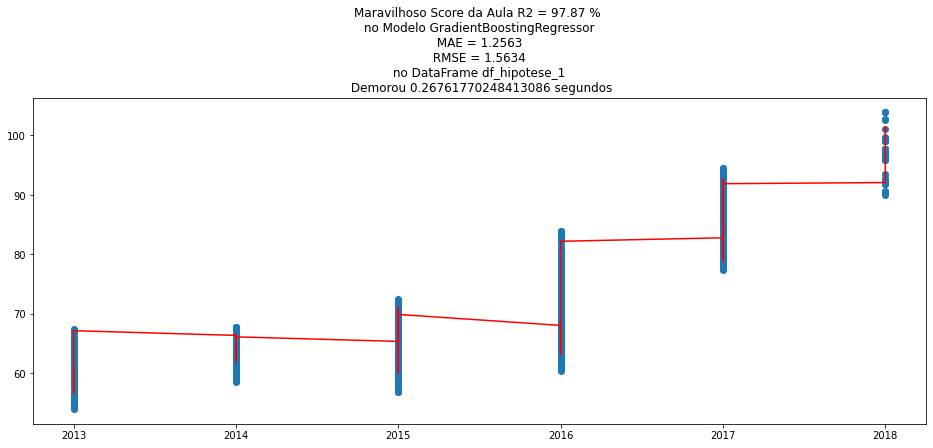

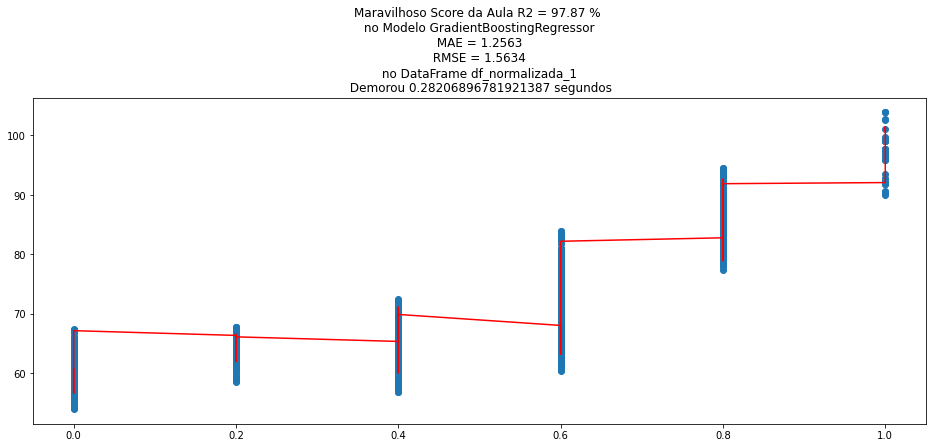

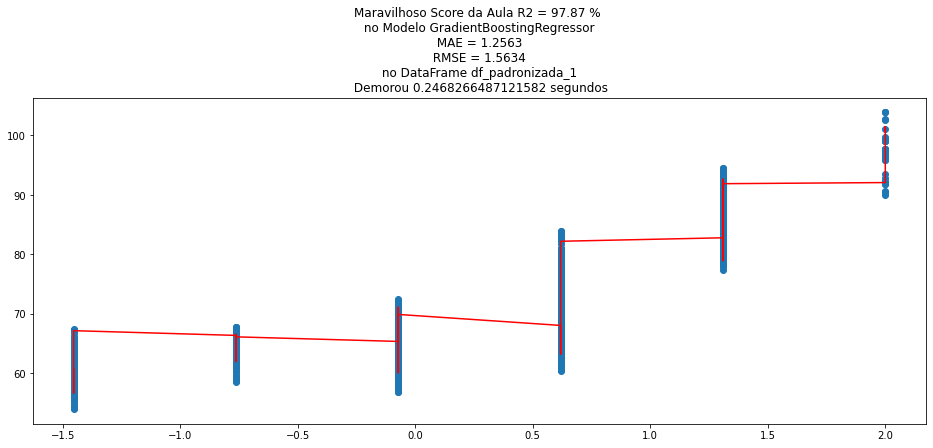

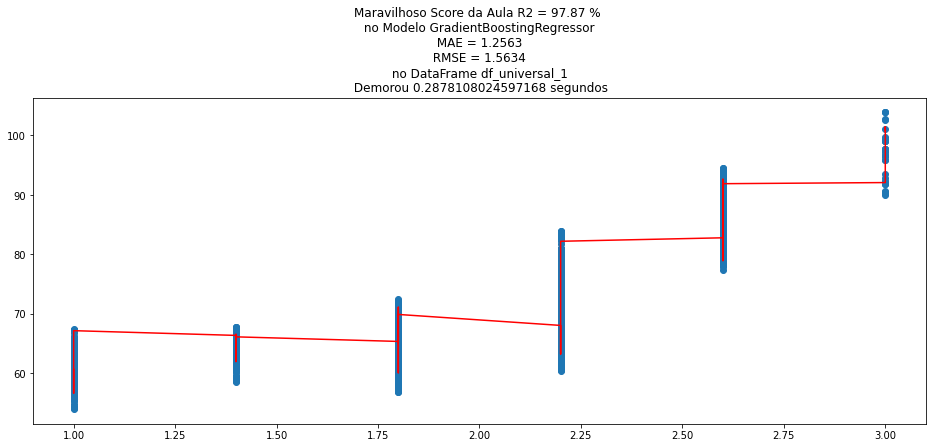

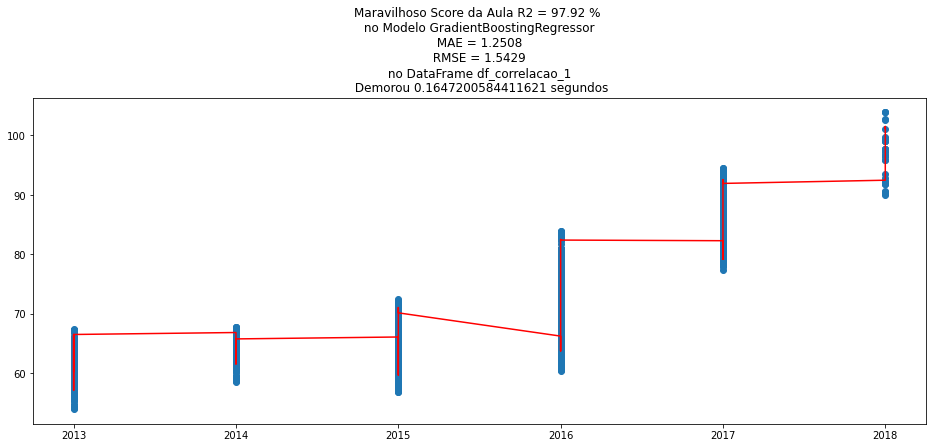

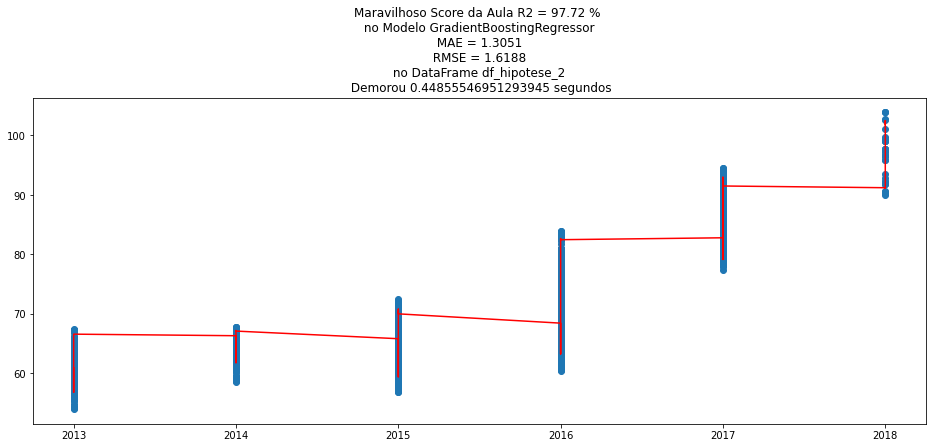

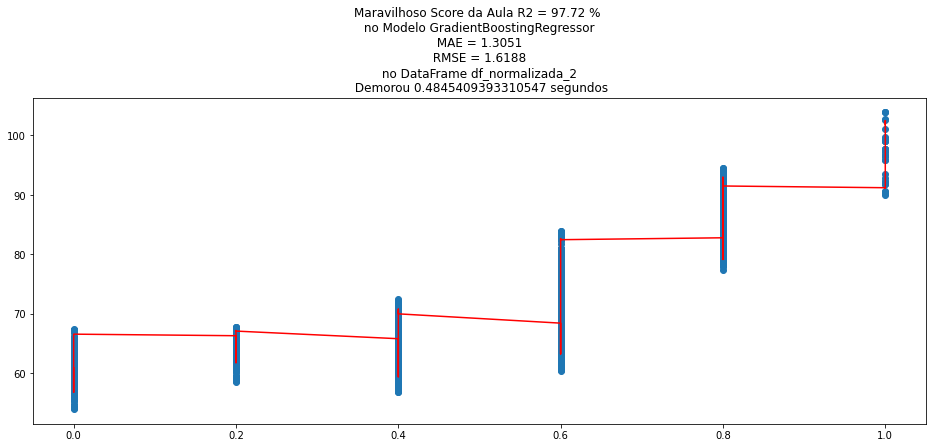

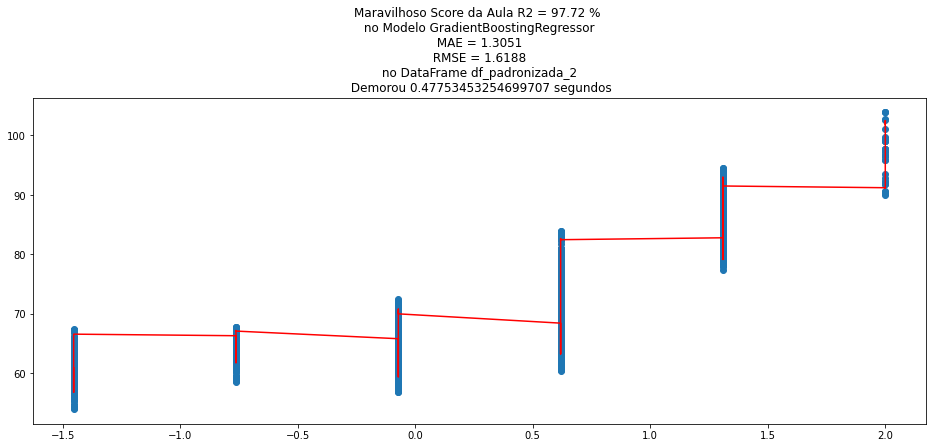

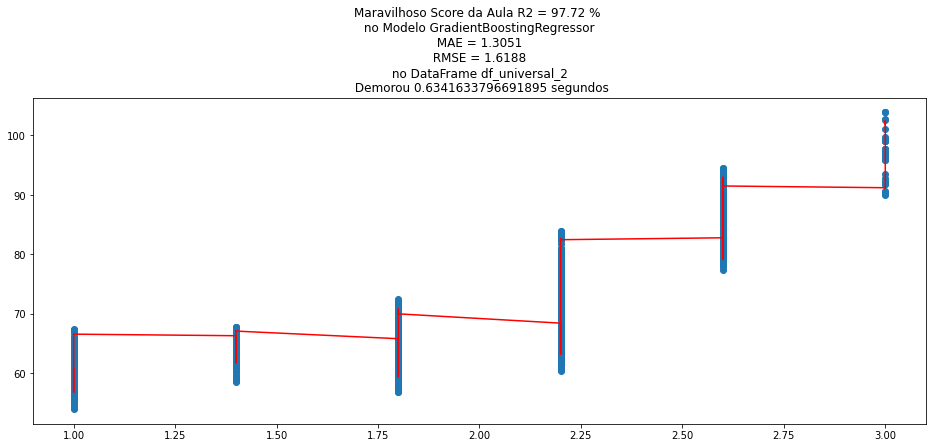

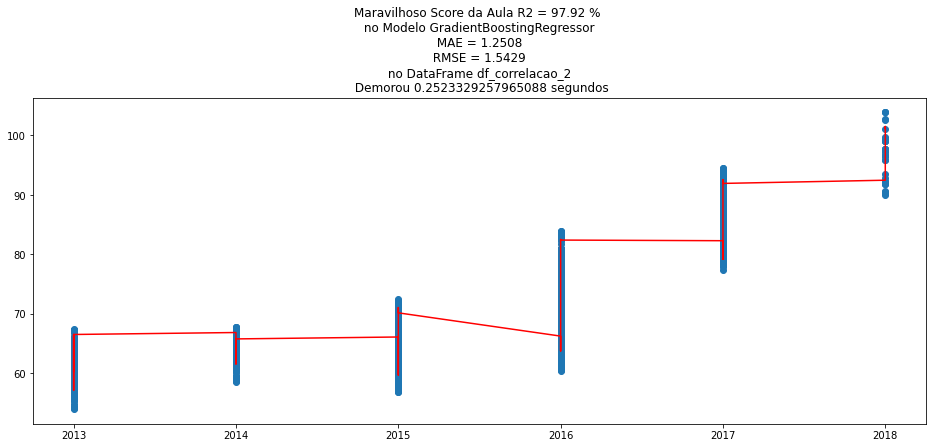

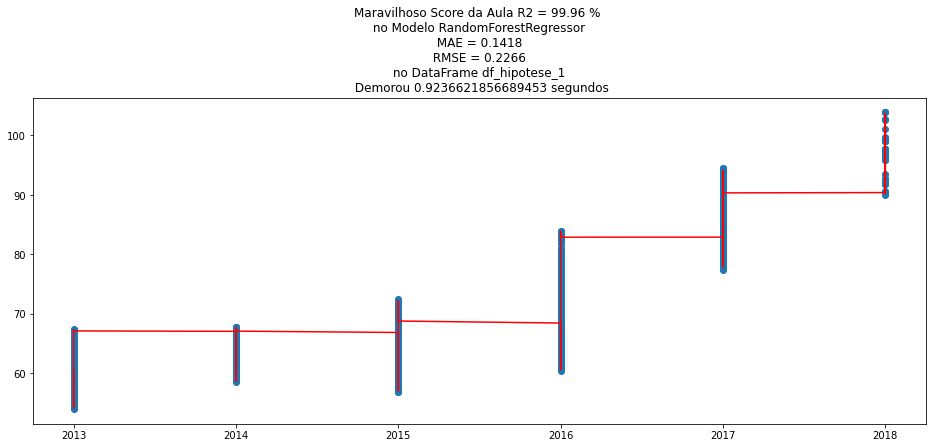

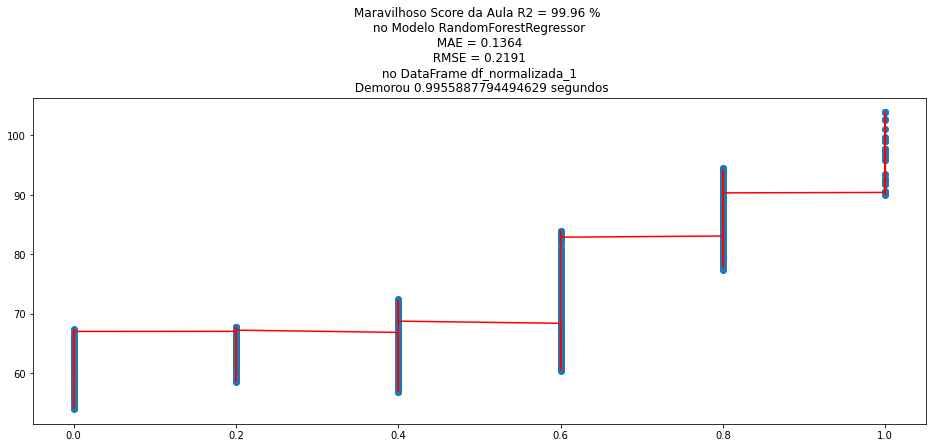

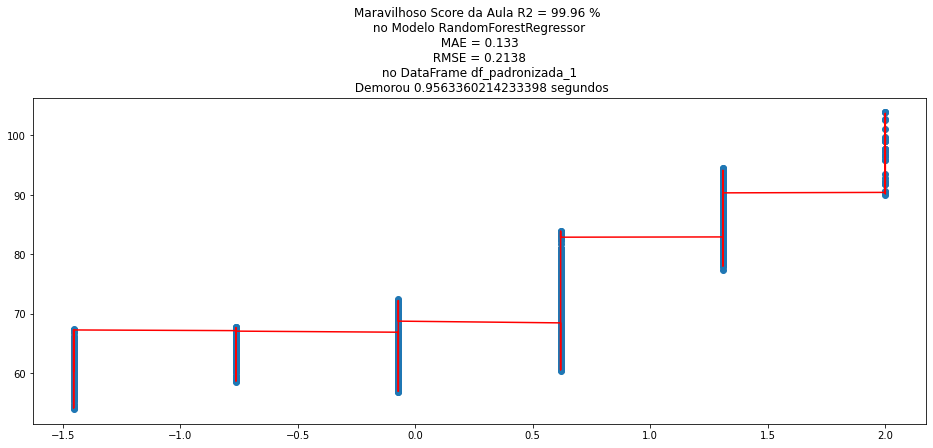

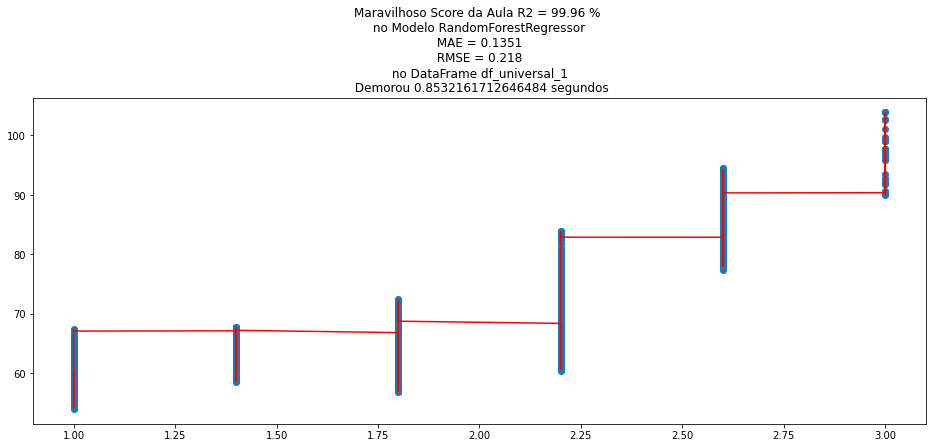

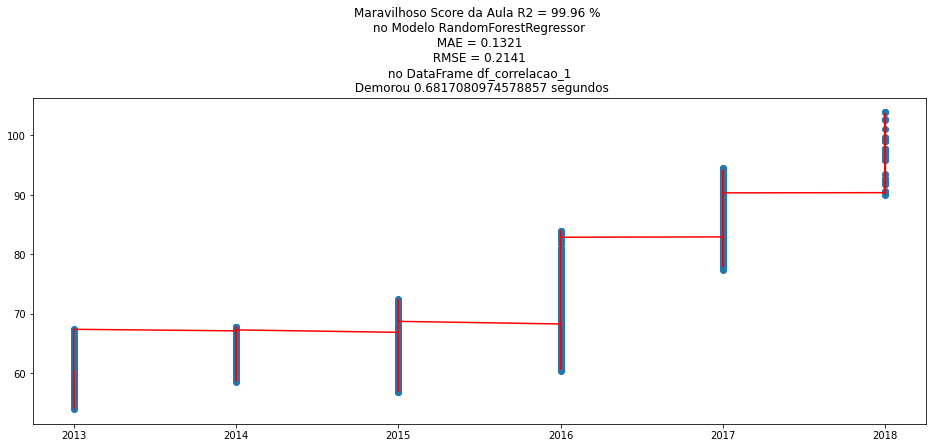

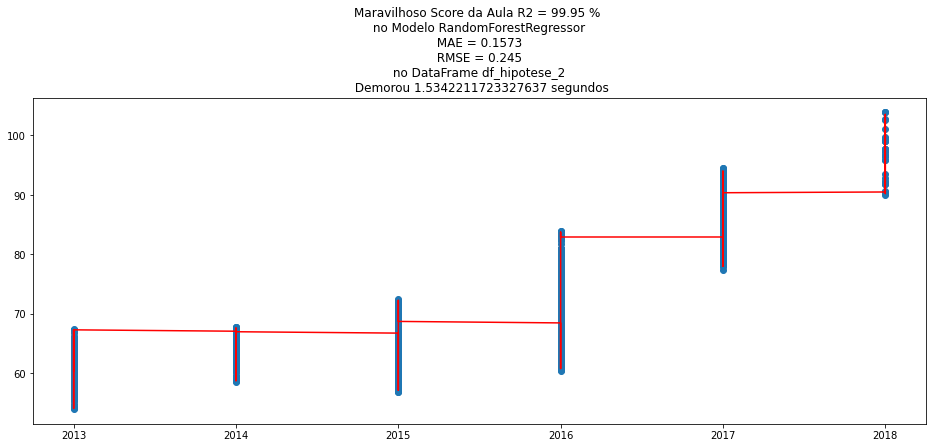

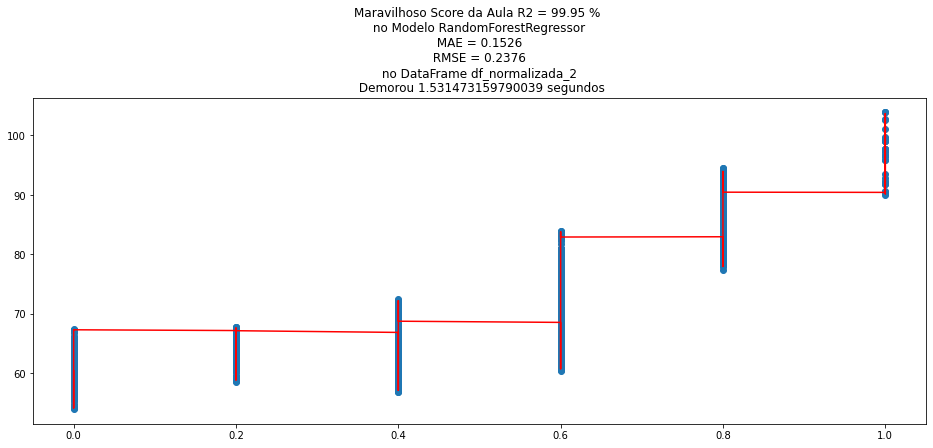

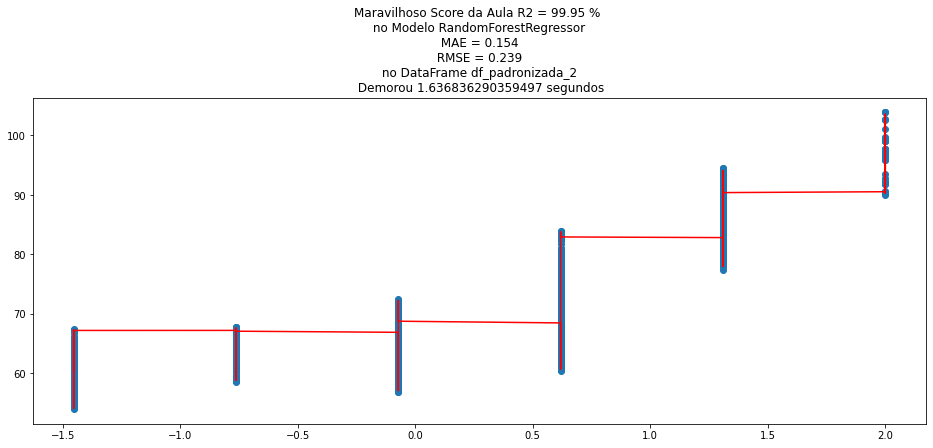

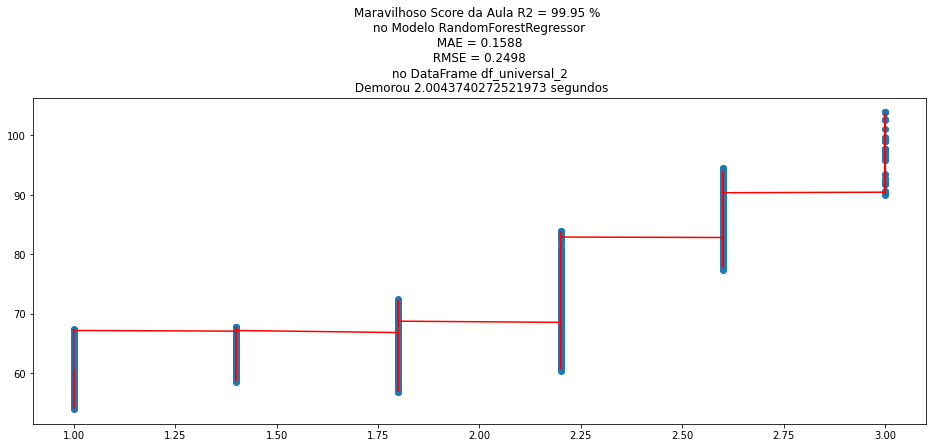

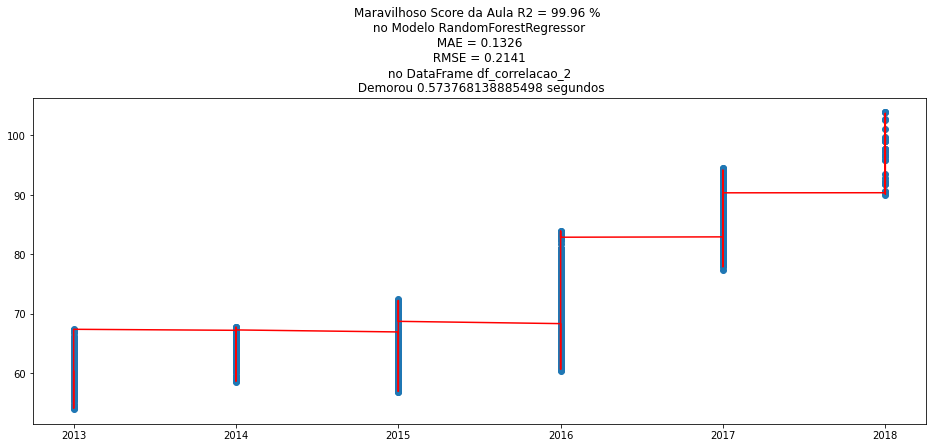

In [ ]:
# Faz o Loop de todos
Lista_Benchmark = []
for modelo_nome, modelo_teste in zip(Nomes_Modelos, Opcoes_Modelos):
    for df_nome, df_teste in zip(Nomes_df, Opcoes_df):
      #Tempo
      tempo_inicial = time.time()

      # Defina o DataFrame que quer modelar
      df_Regressao = df_teste.copy()

      # Instacia o modelo
      modelo = modelo_teste()

      # Separa as Colunas
      X = df_Regressao.drop(columns = Coluna_y).copy()
      y = df_Regressao.loc[:, [Coluna_y]].copy()

      # Treina o Modelo
      modelo.fit(X, y)

      # Metricas de Resultado
      predicao = modelo.predict(X)
      tempo_final = time.time() - tempo_inicial
      RMSE = round(metrics.mean_squared_error(y, predicao, squared=False), 4) 
      MAE = round(metrics.mean_absolute_error(y, predicao), 4)
      R2 = round(metrics.r2_score(y, predicao), 4)

      # Score Bonito
      score_bonito = f"{R2 * 100}"[:5] + " %"
      titulo = "Maravilhoso Score da Aula R2 = " + score_bonito
      titulo = titulo + f" \n no Modelo {modelo_nome}"
      titulo = titulo + f" \n MAE = {MAE}"
      titulo = titulo + f" \n RMSE = {RMSE}"
      titulo = titulo + f" \n no DataFrame {df_nome}"
      titulo = titulo + f" \n Demorou {tempo_final} segundos"

      # Escolher a Coluna Mais bem CoRelacionada com Y
      Coluna_Bem_Corr = df_Regressao.corr().iloc[:-1, -1:].apply(abs).sort_values(Coluna_y)
      Coluna_Bem_Corr = Coluna_Bem_Corr[-1:].index[0]
      # Pegar o Id da Coluna
      Id_Coluna_corr = df_Regressao.columns.get_loc(Coluna_Bem_Corr)

      # Plotar o Gráfico do Mundo Real
      plt.figure(figsize = (16, 6))
      plt.scatter(x = df_Regressao[Coluna_Bem_Corr], y = df_Regressao[Coluna_y])
      #plt.plot(df_Regressao[Coluna_Bem_Corr], predicao, c = 'red')
      plt.plot(df_Regressao[Coluna_Bem_Corr].sort_values(), predicao, c = 'red')
      plt.title(titulo)
      plt.show()

      Lista_Benchmark.append([modelo_nome, df_nome, tempo_final, MAE, RMSE, R2])


## Resultados

In [ ]:
#Comparando
Colunas_Benchmark = ["Modelo","Base",'Tempo','MAE','RMSE','R2']
df_Resultados = pd.DataFrame(Lista_Benchmark, columns = Colunas_Benchmark) 
df_Resultados

,Modelo,Base,Tempo,MAE,RMSE,R2
0,LinearRegression,df_hipotese_1,0.081088,4.2210,5.3080,0.7546
1,LinearRegression,df_normalizada_1,0.020670,4.2210,5.3080,0.7546
2,LinearRegression,df_padronizada_1,0.028573,4.2210,5.3080,0.7546
3,LinearRegression,df_universal_1,0.030846,4.2210,5.3080,0.7546
4,LinearRegression,df_correlacao_1,0.051294,4.2429,5.3153,0.7539
5,ElasticNet,df_hipotese_1,0.066762,4.5519,5.7074,0.7163
6,ElasticNet,df_normalizada_1,0.055235,8.1303,9.8247,0.1593
7,ElasticNet,df_padronizada_1,0.066853,4.9908,6.3997,0.6433
8,ElasticNet,df_universal_1,0.049226,6.4475,8.0495,0.4357
9,ElasticNet,df_correlacao_1,0.018761,4.5562,5.7105,0.7160


In [ ]:
for df_Resultados["Base"] in Nomes_df_1:
  df_Resultados_1 = df_Resultados.copy()
df_Resultados_1

,Modelo,Base,Tempo,MAE,RMSE,R2
0,LinearRegression,df_correlacao_1,0.081088,4.2210,5.3080,0.7546
1,LinearRegression,df_correlacao_1,0.020670,4.2210,5.3080,0.7546
2,LinearRegression,df_correlacao_1,0.028573,4.2210,5.3080,0.7546
3,LinearRegression,df_correlacao_1,0.030846,4.2210,5.3080,0.7546
4,LinearRegression,df_correlacao_1,0.051294,4.2429,5.3153,0.7539
5,ElasticNet,df_correlacao_1,0.066762,4.5519,5.7074,0.7163
6,ElasticNet,df_correlacao_1,0.055235,8.1303,9.8247,0.1593
7,ElasticNet,df_correlacao_1,0.066853,4.9908,6.3997,0.6433
8,ElasticNet,df_correlacao_1,0.049226,6.4475,8.0495,0.4357
9,ElasticNet,df_correlacao_1,0.018761,4.5562,5.7105,0.7160


In [ ]:
for df_Resultados["Base"] in Nomes_df_2:
  df_Resultados_2 = df_Resultados.copy()
df_Resultados_2

,Modelo,Base,Tempo,MAE,RMSE,R2
0,LinearRegression,df_correlacao_2,0.081088,4.2210,5.3080,0.7546
1,LinearRegression,df_correlacao_2,0.020670,4.2210,5.3080,0.7546
2,LinearRegression,df_correlacao_2,0.028573,4.2210,5.3080,0.7546
3,LinearRegression,df_correlacao_2,0.030846,4.2210,5.3080,0.7546
4,LinearRegression,df_correlacao_2,0.051294,4.2429,5.3153,0.7539
5,ElasticNet,df_correlacao_2,0.066762,4.5519,5.7074,0.7163
6,ElasticNet,df_correlacao_2,0.055235,8.1303,9.8247,0.1593
7,ElasticNet,df_correlacao_2,0.066853,4.9908,6.3997,0.6433
8,ElasticNet,df_correlacao_2,0.049226,6.4475,8.0495,0.4357
9,ElasticNet,df_correlacao_2,0.018761,4.5562,5.7105,0.7160


In [ ]:
Filtro_100 = df_Resultados["R2"] < 1
df_Melhor = df_Resultados[Filtro_100]
Filtro_Melhor_R2 = df_Melhor["R2"] == df_Melhor["R2"].max()
df_Melhor_RMSE = df_Melhor[Filtro_Melhor_R2]
df_Melhor_RMSE

,Modelo,Base,Tempo,MAE,RMSE,R2
30,RandomForestRegressor,df_hipotese_1,0.711056,0.1381,0.2265,0.9996
31,RandomForestRegressor,df_normalizada_1,0.630870,0.1351,0.2138,0.9996
32,RandomForestRegressor,df_padronizada_1,0.674759,0.1348,0.2151,0.9996
33,RandomForestRegressor,df_universal_1,0.628201,0.1375,0.2203,0.9996
34,RandomForestRegressor,df_correlacao_1,0.387008,0.1315,0.2144,0.9996


In [ ]:
Filtro_100 = df_Resultados["R2"] < 1
df_Melhor = df_Resultados[Filtro_100]
Filtro_Melhor_RMSE = df_Melhor["RMSE"] == df_Melhor["RMSE"].min()
df_Melhor_RMSE = df_Melhor[Filtro_Melhor_RMSE]
df_Melhor_RMSE

,Modelo,Base,Tempo,MAE,RMSE,R2
31,RandomForestRegressor,df_normalizada_1,0.63087,0.1351,0.2138,0.9996


In [ ]:
#df_Resultados.sort_values(by="Tempo")

In [ ]:
Filtro_bom = df_Resultados["R2"] > 0.5
df_Bom = df_Resultados[Filtro_100]
df_Bom = df_Bom[Filtro_bom]
df_Bom.sort_values(by="Tempo")

,Modelo,Base,Tempo,MAE,RMSE,R2
19,PseudoInversa,df_correlacao_1,0.011895,4.2429,5.3153,0.7539
18,PseudoInversa,df_universal_1,0.012403,4.2210,5.3080,0.7546
15,PseudoInversa,df_hipotese_1,0.016846,4.2210,5.3080,0.7546
9,ElasticNet,df_correlacao_1,0.018761,4.5562,5.7105,0.7160
1,LinearRegression,df_normalizada_1,0.020670,4.2210,5.3080,0.7546
17,PseudoInversa,df_padronizada_1,0.021381,4.2210,5.3080,0.7546
16,PseudoInversa,df_normalizada_1,0.024140,4.2210,5.3080,0.7546
2,LinearRegression,df_padronizada_1,0.028573,4.2210,5.3080,0.7546
3,LinearRegression,df_universal_1,0.030846,4.2210,5.3080,0.7546
4,LinearRegression,df_correlacao_1,0.051294,4.2429,5.3153,0.7539
